<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">

<font align="center" color='white'>
    <h1/>Credit Card Fraud Detection</h1>
</font>

</div>

## Summary

* [0.2. Load Data](#02-load-data)
* [3.0. Feature Engineering](#30-feature-engineering)
* [5.0 Data Preprocessing](#50-preprocessing)

# Business Understanding

## **Overview**

The usage of credit cards has increased drastically with the advance in electronic commerce technology. Right now, the credit card is the most popular payment method worldwide. With that enormous usage came an explosion in credit card fraud activities. Considering that fraud is extremely costly for the industry, credit card fraud prevention and detection are crucial. 

Financial institutions must continually improve their fraud detection systems because fraudsters are constantly finding new ways to fraud the system. That said, the fraud detection system must be capable of learning and adapting to new patterns for preventing fraud. Otherwise, the company will lose money and the customer's trust.



## Fraud

Fraud is any activity that relies on deception in order to achieve a gain. In fraud, the fraudster has the intention to illegally or unethically gain at the expense of another. This illegal activity costs the economy billions of dollars every year, and fraudsters are subject to fines and jail time. There are many types of fraud, such as tax fraud, credit card fraud, wire fraud, securities fraud, and bankruptcy fraud. In this project, we'll focus on credit card fraud.

## Credit Card Fraud

Now that we have got a grasp of what fraud is. Let's delve into credit card fraud which is the type of fraud we are interested in.

**Credit card fraud is a form of identity theft that occurs when someone uses another person's credit card or credit card information to buy something or access an account without permission.** There are a few types of credit card fraud, and we will talk about five of them.

**Card-not-present (CNP) fraud**

The fraudster steals the cardholder's credit card details and personal information. This information can be bought on the dark web or phishing scam. This type of fraud is difficult to prevent because there is no physical card to examine, and the buyer's identity can't be verified.

**Credit Card Application fraud**

With your personal information — name, address, birthday, and social security number — scammers might be able to access your credit card account or apply for a new credit card. This type of fraud can affect your credit score, but you won't be responsible for any purchase made with the fraudulent card.

**Lost or stolen card fraud**

This is an old-school method where the fraudster uses a credit card that was lost or stolen from someone.

**Credit Card Skimming**

Fraudsters use skimmers (devices that steal credit card information from the magnetic strip in the back of the card). This device is attached to credit card reader machines like an ATM. And then they can sell your information on the dark web or use it themselves.

**Account takeover**

The fraudster steals your personal information and then contacts the credit card company pretending to be you. They change the password and PINs so they can take over the account.


## Statistics (2023)

In 2020, direct losses by merchants and banks exceeded 28.58 billion worldwide.

A recent study shows that all the information — the victim's name, social security number, and date of birth can be acquired for just over $100.

Almost half of all consumers (48%) believe that online brands are responsible for protecting customers from online fraud and indentity thef.

According to the Global Economic Crime and Fraud Survey, companies with fraud prevention programs reduced their fraud attack response expenses by 42%.

Global losses from credit card fraud will reach 48 billion in 2026.

<img src='https://drive.google.com/u/0/uc?id=1Lur7sqFVrnSgWWefT6OCwuw2VHgfJkbz&export=download'/>

source: [Chargebacks - Nilson Report](https://chargebacks911.com/credit-card-fraud-statistics/)


## Detection Methods

**Security Features**

The Address Verification Service confirms the cardholder's identity by looking at his registered address.

**3-D Secure (3DS)**

Security layer where the user has to enter a code to complete a purchase.

**CVV**

Card Verification Value - a three-digit number on the card to verify if the card is in possession of the customer at the time of purchase.

**Risk Scoring**

Standard risk management method that helps people make educated guesses about a certain user action. For credit card fraud, this method relies on heuristics rules (if-then logic).

**Device Fingerprint**

Find out if the user connected to your with the device before.

**IP analyis**

The connection came from a VPN?

**BIN lookup**

Is the payment card the right kind?

**Reverse social media lookup**

Has the phone number or email address been used to register to a social media website? Does the user bio seem consistent with the transaction details?



https://www.investopedia.com/terms/f/fraud.asp

https://chargebacks911.com/credit-card-fraud-statistics/

https://www.synovus.com/personal/resource-center/financial-safety-and-security/types-of-credit-card-fraud/

https://thepaypers.com/digital-identity-security-online-fraud/84-of-people-say-businesses-should-use-ai-fraud-protection--1250549

https://www.pwc.com/gx/en/forensics/gecs-2020/pdf/global-economic-crime-and-fraud-survey-2020.pdf

https://seon.io/resources/credit-card-fraud-detection/

**Objective:**

The Objective of this project is to develop a machine learning solution to deal with credit card fraud detection where we aim to achieve at least 90% accuracy with our model.

**Challenges:**

1. Fraud is a rare event compared to legitimate transactions, therefore our data is likely to be heavily imbalanced.

2. The system needs to adapt to new patterns for preventing frauds.

## Data Dictionary

Attribute|Description
-----|------------------------------|
index|Unique Identifier for each row
trans_date_trans_time|Transaction DateTime
cc_num|Credit Card Number of Customer
merchant|Merchant Name
category|Category of Merchant
amt|Amount of Transaction
first|First Name of Credit Card Holder
last|Last Name of Credit Card Holder
gender|Gender of Credit Card Holder
street|Street Address of Credit Card Holder
city|City of Credit Card Holder
state|State of Credit Card Holder
zip|Zip of Credit Card Holder
lat|Latitude Location of Credit Card Holder
long|Longitude Location of Credit Card Holder
city_pop|Credit Card Holder's City Population
job|Job of Credit Card Holder
dob|Date of Birth of Credit Card Holder
trans_num|Transaction Number
unix_time|UNIX Time of transaction
merch_lat|Latitude Location of Merchant
merch_long|Longitude Location of Merchant
is_fraud|Fraud Flag (Target Class)

# 0.0 Imports

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as sp
import scipy.stats as ss
import scikitplot as skp
import matplotlib.patches as pc
import sweetviz as sv
import dexplot as dxp

## Preprocess
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as pp
from sklearn.compose import ColumnTransformer
from geopy.distance import distance, great_circle

# Imbalance
import imblearn as imb
import imblearn.pipeline as imb_pipe

## Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
import sklearn.metrics as mt


## Models
import tensorflow as ts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Optmization
import optuna as opt
from optuna.samplers import TPESampler

## Experiments
import mlflow

e:\users\b_tc\anaconda3\envs\fraud_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.1 Helper Functions

In [84]:
def plots_configs():

    #plt.style.use('ggplot')
    plt.rcParams.update({'figure.facecolor': (1.0, 1.0, 0.80, 0.15)})
    
    plt.rcParams['figure.figsize'] = (8, 4)
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    #plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.grid'] = False
    plt.rcParams['font.size'] = 13
    pd.options.display.max_columns = None
    plt.rcParams['font.sans-serif'] = 'Arial'
    pd.set_option('display.expand_frame_repr', False)
     
    #plt.rcParams.update({'figure.facecolor': (0.0, 0.0, 0.0, 0.0),
    #                     'axes.facecolor': (0.0, 0.0, 0.0, 0.0),
    #                     'savefig.facecolor': (0.0, 0.0, 0.0, 0.0)})
     
    
    #plt.rcParams['text.color'], plt.rcParams['axes.labelcolor'], plt.rcParams['xtick.color'], plt.rcParams['ytick.color'] = 'white', 'white', 'white', 'white'

def sum_table(df_):

    """This function receives a dataset and returns a dataframe with information about each column of the dataset.
    Args:
        df_ (DataFrame): Dataset.

    Returns:
        DataFrame: returns a dataframe with the number of unique values and missing value of each column of a dataset.
    """

    summary = df_.dtypes.to_frame().rename(columns={0: 'dtypes'})
    summary['Uniques'] = df_.nunique()
    summary['Missing'] = df_.isnull().sum()
    summary['Missing %'] = np.round((df_.isnull().sum()/len(df_)).values*100, 2)
    summary = summary.reset_index().rename(columns={'index': 'Name'})

    memory_usage = df_.memory_usage(index=False).sum()/1_000_000
    print(f'Memory Usage: {memory_usage:.2f} MB')
    return summary


def stats_table(df):

    """This function receives a dataframe and returns a dataframe with summary statistics.

    Args:
        df (DataFrame): Dataset.

    Returns:
        DataFrame: Table with summary statistics.
    """

    num_att = df.select_dtypes(exclude=['object', 'datetime64[ns]'])

    return num_att.agg(['min', 'max', 'ptp', 'median', 'mean', 'std', 'var', 'skew', 'kurtosis']).T.reset_index().rename(columns={'ptp': 'range', 'index': 'attributes'})


### Feature Engineering
def city_size_by_pop(x):

    "Creates classes in respect to the size of the city taking i consideration the city's population."
    
    if x < 50000:
        return 'micro'
    if x >= 50000 and x < 100000:
        return 'small'
    elif x >= 100000 and x < 150000:
        return 'small_mid'
    elif x >= 150000 and x < 500000:
        return 'mid'
    else:
        return 'large'

def times_of_day(x):

    "Creates a label for the periods of the day."
    
    if x >= 0 and x <= 12:
        return 'morning'
    elif x > 12 and x <= 18:
        return 'afternoon'
    else:
        return 'evening'


# adapted from the book Fighting churn with data
def categorical_cohort_summary(df, cat_col, target, transform=True):

    """
    This function receives a data frame, the column name of a categorical variable, and the column name of the target variable. It then computes the proportion and the confidence interval of positive labels (target) for each class of the categorical variable.

    Args:
        df (DataFrame): data frame
        cat_col (string): name of the column of the categorical variable
        target (string): name of the column of the target variable
        transform (bool, optional): Whether to transform the categorical column into Yes and No classes. Defaults to True.

    Returns:
        DataFrame: A data frame with the proportion of positive labels and the lower and higher limits of the confidence interval for each class of the categorical variable.  
    """

    df = df.copy()

    if df[cat_col].dtype == 'int64' and transform:
        df[cat_col] = df[cat_col].apply(lambda x: 'Yes' if x==1 else 'No')

    summary = df.groupby(cat_col).agg({cat_col: 'count', target: ['sum', 'mean']})
    intervals = sp.proportion_confint(summary[(target, 'sum')], summary[(cat_col, 'count')], alpha=0.05, method='wilson')

    summary[cat_col+'_percent'] = ((1/df.shape[0])*summary[(cat_col, 'count')])

    summary['lo_conf'] = intervals[0]
    summary['hi_conf'] = intervals[1]

    summary['lo_int'] = summary[(target, 'mean')] - summary['lo_conf']
    summary['hi_int'] = summary['hi_conf'] - summary[(target, 'mean')] 

    summary['lo_int'] = summary['lo_int'].apply(lambda x: x if x >= 0 else 0.0)

    return summary


def freq_fraud_plot(vit_list, df_aux, title=None, col='cc_num'):
    
    df_freq = pd.DataFrame()

    for i in range(len(vit_list)):

        vit = df_aux.query(f'{col} == {vit_list[i]}')[['is_fraud']].resample('D').agg(['count', 'mean']).reset_index()
        
        df_freq = pd.concat([df_freq, vit])

    _, ax = plt.subplots(1, 2, figsize=(20, 5))
    df_freq.groupby([('is_fraud', 'count'), ('is_fraud', 'mean')]).count().plot(kind='bar', ax=ax[0])
    ax[0].legend([])
    ax[0].set_title(title)
    ax[0].set_xlabel('Count x Fraud')
    df_freq.loc[df_freq[('is_fraud', 'mean')] != 0].groupby([('is_fraud', 'count'), ('is_fraud', 'mean')]).count().plot(kind='bar', ax=ax[1])
    ax[1].legend([])
    ax[1].set_title(title)
    ax[1].set_xlabel('Count x Fraud') 

# adapted from the book Fighting churn with data
def cohort_plot_cat(df, cat_col, target, transform=True, ax=None):

    """
    This function plots the cohort plot of a categorical variable with the values obtained with the `categorical_cohort_summary` function.
    """
    
    summary = categorical_cohort_summary(df, cat_col, target, transform)

    n_category = summary.shape[0]

    colors = sns.color_palette('Set2')[0:n_category]
    bar = ax.bar(x=summary.index, label=cat_col, height=summary[(target, 'mean')], yerr=summary[['lo_int', 'hi_int']].T.values, capsize=80/n_category, color=colors)

    ax.axes.bar_label(bar, labels=[f'{i:.2%}' for i in bar.datavalues])

    ax.set_title(f'Fraud by {cat_col}', fontsize=16)
    ax.set_xlabel(cat_col)
    ax.set_ylabel('Fraud Rate')
    ax.set_yticks([])
    #ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=15)
    #plt.grid()
    #plt.show()


def pie_bar_plot(data, var, title=''):
    
    # Pie Plot
    prop = pd.DataFrame(data[var].value_counts())
    colors = sns.color_palette('Set2')[0:2]
    _, ax =plt.subplots(1, 2, figsize=(20, 8)) 
    ax[0].pie(prop['count'], labels=['not fraud', 'fraud'], autopct='%.3f%%' , explode=[0.1, 0.5], colors=colors)
    ax[0].set_title(f'{title}')

    # Count Bar Plot
    bar = ax[1].bar(x=['not fraud', 'fraud'], height=prop['count'], color=colors)
    plt.bar_label(bar, fmt='{:,.2f}')
    ax[1].set_title(f'{title}')
    ax[1].set_ylabel(f'Quantity')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_yticks([])
    
    plt.tight_layout();


def cohort_plot(df, num_var, response, ax=None, colors=['teal'], q=10):

    """_summary_
    """

    groups = pd.qcut(df[num_var], q=q, duplicates='drop')

    df_plot = df.groupby(groups).mean(numeric_only=True)[[num_var, response]].rename(columns={response: 'fraud %'})
    df_plot['fraud %'] = df_plot['fraud %']*100

    ax.plot(df_plot[num_var], df_plot['fraud %'], marker='o', markersize=3.5, markerfacecolor='red', color=colors[0])
    ax.set_title(f'{num_var.capitalize()} x Fraud');


def cramer_v(x, y):

    """
    This function receives two categorical variables (arrays). It then computes the association between them using the Cramer V method.
    """
    cm = pd.crosstab(x, y)
    return ss.contingency.association(cm, method='cramer', correction=True)


def count_plots(df, agg_column, ref_column, color='teal', ax=None, num=14):
    
    bar = df.groupby(agg_column).count()[[ref_column]].rename(columns={ref_column: 'count'}).sort_values('count', ascending=False)[: num].plot(kind='bar', color=color, ec='teal', ax=ax)

    ax.axes.bar_label(bar.containers[0])
   
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70,)
    
    ax.set_ylabel('Count')
    ax.set_yticks([])
    ax.set_title(f'{str(agg_column).capitalize()} Count');


def model_evaluation_metrics(model, X, y, cv, metrics):
    
    return pd.DataFrame(cross_validate(estimator=model, X=X, y=y, scoring=metrics, return_estimator=True, return_train_score=True, cv=cv))
    

def evaluation_plot(model, X, y_true):

    """
    This function plots 4 graphics — cumulative gain, lift curve, roc curve and precision recall curve — to evaluate the performance of a classifier.
    """


    cmap = sns.diverging_palette(150, 30, 180)
    y_prob = model.predict_proba(X)
    y_hat = model.predict(X)

    fig, axis = plt.subplots(2, 2, figsize=(20, 15))
    
    skp.metrics.plot_confusion_matrix(y_true, y_hat, ax=axis[0, 0], cmap='YlOrBr', text_fontsize=20)
    skp.metrics.plot_precision_recall(y_true, y_prob, ax=axis[0, 1], text_fontsize=20)
    skp.metrics.plot_roc(y_true, y_prob, ax=axis[1, 0], plot_micro=False, plot_macro=False, cmap='hot', text_fontsize=20)
    
    skp.metrics.plot_ks_statistic(y_true, y_prob, ax=axis[1, 1], text_fontsize=20)

    plt.tight_layout()


def track_model_experiments(model, X, y, cv, training_parameters, metrics, preprocess, columns, description=''):

    # adapted from https://github.com/OmdenaAI/sao-paulo-chapter-passenger-demand/blob/main/src/tasks/task_3_model_training_validation/ds_gustavo_cunha/0.0_gustavo-cunha_first_iteration.ipynb
    mlflow_experiment = 'fraud_classification_experiment_clf'

    try:
        experiment_id = mlflow.create_experiment(name=mlflow_experiment)

    except mlflow.exceptions.MlflowException:
        experiment_id = mlflow.get_experiment_by_name(name=mlflow_experiment).experiment_id

    model_tag = str(model).split('(')[0]

    pipe = Pipeline([('preprocessing', preprocess), (model_tag, model)])

    with mlflow.start_run(experiment_id=experiment_id, run_name=model_tag, tags={'experiment_type': 'fraud detection', 'model': model_tag}, description=description):

        results = pd.DataFrame(cross_validate(estimator=pipe, X=X, y=y, scoring=metrics, return_estimator=True, return_train_score=True, cv=cv))

        train_test_metrics = ['train_' + score for score in metrics] + ['test_' + score for score in metrics]
        track_metrics = {score: results[score].mean() for score in train_test_metrics}
  

        mlflow.log_params(training_parameters)
        mlflow.log_metrics(track_metrics)
        mlflow.log_param('columns', columns)

        mlflow.sklearn.log_model(pipe, artifact_path='mlruns/models', registered_model_name=model_tag)
        
    return results


def track_model_experiments_resample(model, X, y, cv, training_parameters, metrics, preprocess, sampler, columns, description=''):

    # adaptad from https://github.com/OmdenaAI/sao-paulo-chapter-passenger-demand/blob/main/src/tasks/task_3_model_training_validation/ds_gustavo_cunha/0.0_gustavo-cunha_first_iteration.ipynb
    mlflow_experiment = 'fraud_classification_experiment_resampled'

    try:
        experiment_id = mlflow.create_experiment(name=mlflow_experiment)

    except mlflow.exceptions.MlflowException:
        experiment_id = mlflow.get_experiment_by_name(name=mlflow_experiment).experiment_id

    model_tag = str(model)[:-2]

    pipe = imb_pipe.Pipeline([('preprocessing', preprocess), ('sampler', sampler), (model_tag, model)])

    with mlflow.start_run(experiment_id=experiment_id, run_name=model_tag, tags={'experiment_type': 'fraud detection', 'model': model_tag}, description=description):

        results = pd.DataFrame(cross_validate(estimator=pipe, X=X, y=y, scoring=metrics, return_estimator=True, return_train_score=True, cv=cv))

        train_test_metrics = ['train_' + score for score in metrics] + ['test_' + score for score in metrics]
        track_metrics = {score: results[score].mean() for score in train_test_metrics}
  

        mlflow.log_params(training_parameters)
        mlflow.log_metrics(track_metrics)
        mlflow.log_param('columns', columns)

        mlflow.sklearn.log_model(pipe, artifact_path='mlruns/models', registered_model_name=model_tag)
        
    return results


def plot_feature_importance(ordered_cols, imp):

    feature_importances = dict(zip(ordered_cols, imp))
    importance = list(feature_importances.values())
    featname = list(feature_importances.keys())

    # Ordering by Feature Importance
    ordered_index = np.argsort(importance)
    sorted_imp = [importance[i] for i in ordered_index[::-1]]
    sorted_features = [featname[i] for i in ordered_index[::-1]]

    # Plot
    plt.figure(figsize=(8, 12))
    bar = sns.barplot(y=sorted_features, x=sorted_imp)
    plt.bar_label(bar.containers[0], sorted_imp, label_type='edge', fmt='{:.3f}');

In [3]:
plots_configs()

## 0.2 Load Data

In [54]:
data = pd.read_csv("../data/fraudtrain.csv", dtype={'cc_number': object, 'zip': object}) #.drop(columns=['Unnamed: 0'])

In [55]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


customer - transaction - 

## 0.3 Rename Columns

In [51]:
#old_cols = ['amt', 'cc_num', 'first', 'last', ]
#new_cols = ['amount', 'cc_number', 'name', 'lastname']
#data = data.rename(columns=dict(zip(new_cols, old_cols)))

#data.to_csv('../data/fraudtrain.csv', index=False)
#train, validation = train_test_split(data, test_size=0.15, random_state=42, stratify=data['is_fraud'])
#validation.to_csv('../data/fraud_validation.csv', index=False)
#train.to_csv('../data/fraud_train.csv', index=False)

# 1.0 Data Cleaning 
<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">
</div>



In [60]:
df_desc = data.copy()

## 1.1 Data Dimension 

In [61]:
print(f'Number of rows: {df_desc.shape[0]}')
print(f'Number of columns: {df_desc.shape[1]}')

Number of rows: 1296675
Number of columns: 22


## 1.2 Missing Values & Data Types 

In [62]:
sum_table(df_desc)

Memory Usage: 228.21 MB


,Name,dtypes,Uniques,Missing,Missing %
0,trans_date_trans_time,object,1274791,0,0.0
1,cc_num,int64,983,0,0.0
2,merchant,object,693,0,0.0
3,category,object,14,0,0.0
4,amt,float64,52928,0,0.0
5,first,object,352,0,0.0
6,last,object,481,0,0.0
7,gender,object,2,0,0.0
8,street,object,983,0,0.0
9,city,object,894,0,0.0


## 1.3 Duplicates 

In [63]:
df_desc.duplicated().sum()

0

# 2.0 Descriptive Analysis 
<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">

<font align="center" color='white'>
    <h1/></h1>
</font>

</div>

## 2.1. Numerical Features 

In [64]:
stats_table(df_desc)

,attributes,min,max,range,median,mean,std,var,skew,kurtosis
0,cc_num,6.041621e+10,4.992346e+18,4.992346e+18,3.521417e+15,4.171920e+17,1.308806e+18,1.712974e+36,2.851879,6.179950
1,amt,1.000000e+00,2.894890e+04,2.894790e+04,4.752000e+01,7.035104e+01,1.603160e+02,2.570123e+04,42.277874,4545.644979
2,lat,2.002710e+01,6.669330e+01,4.666620e+01,3.935430e+01,3.853762e+01,5.075808e+00,2.576383e+01,-0.186028,0.812968
3,long,-1.656723e+02,-6.795030e+01,9.772200e+01,-8.747690e+01,-9.022634e+01,1.375908e+01,1.893122e+02,-1.150108,1.855892
4,city_pop,2.300000e+01,2.906700e+06,2.906677e+06,2.456000e+03,8.882444e+04,3.019564e+05,9.117764e+10,5.593853,37.614519
5,unix_time,1.325376e+09,1.371817e+09,4.644080e+07,1.349250e+09,1.349244e+09,1.284128e+07,1.648984e+14,0.003378,-1.087541
6,merch_lat,1.902779e+01,6.751027e+01,4.848248e+01,3.936568e+01,3.853734e+01,5.109788e+00,2.610994e+01,-0.181915,0.795994
7,merch_long,-1.666712e+02,-6.695090e+01,9.972034e+01,-8.743839e+01,-9.022646e+01,1.377109e+01,1.896429e+02,-1.146960,1.848479
8,is_fraud,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.788652e-03,7.586269e-02,5.755148e-03,13.029122,167.758272


<s> City pop -> The minimum value is 23 which is very strange for the population of city. <s>.



In [65]:
df_desc.query('city_pop < 100').city.unique()

array(['Doe Hill', 'Thompson', 'Conway', 'Pointe Aux Pins', 'Westerville',
       'Lonetree', 'Barnard', 'Harrodsburg', 'Kent', 'Gregory',
       'Ratcliff', 'Summerfield', 'Notrees', 'Hannawa Falls', 'Amorita',
       'Slayden', 'Shields', 'Meredith', 'Randolph', 'Ferney', 'Oran',
       'Eagarville', 'Varnell', 'Camden', 'West Bethel'], dtype=object)

In [66]:
df_desc.query('city == "Thompson"').head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
42,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,UT,84540,38.9999,-109.615,46,"Surveyor, minerals",1987-04-23,47238da5b40d126c8abea40a857c7809,1325377911,39.807313,-109.348294,0
59,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,UT,84540,38.9999,-109.615,46,"Surveyor, minerals",1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505,38.419431,-109.380252,0


In [67]:
colors = sns.color_palette('Set2')

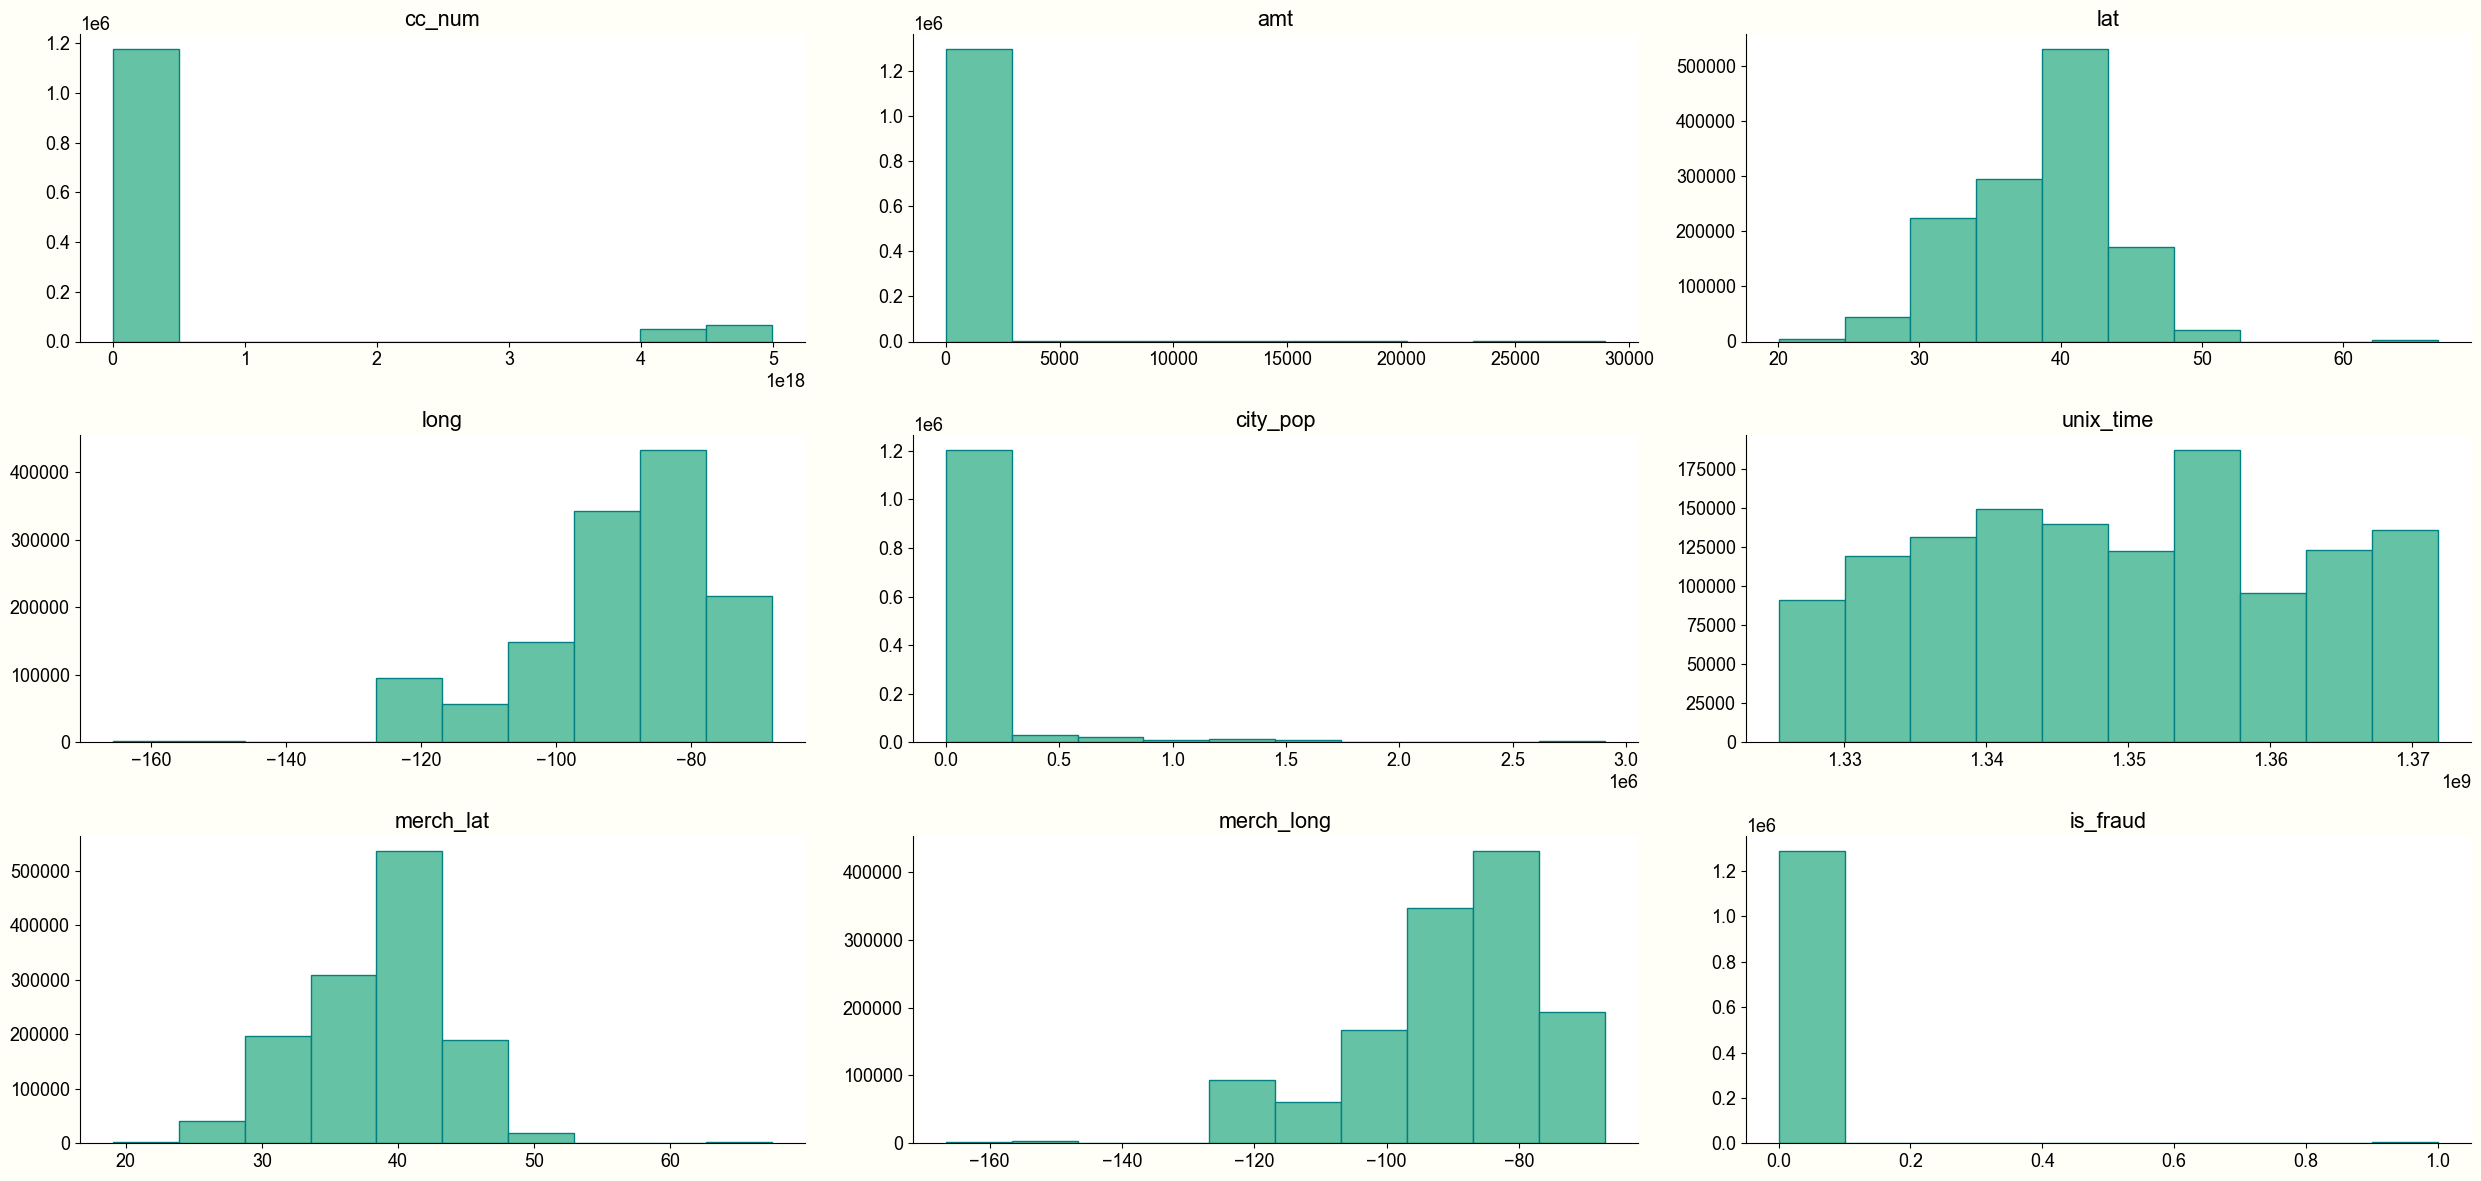

In [68]:
df_desc.hist(grid=False, color=colors[0], ec='teal', figsize=(25, 12))
plt.tight_layout();

## 2.2 Categorical Features 

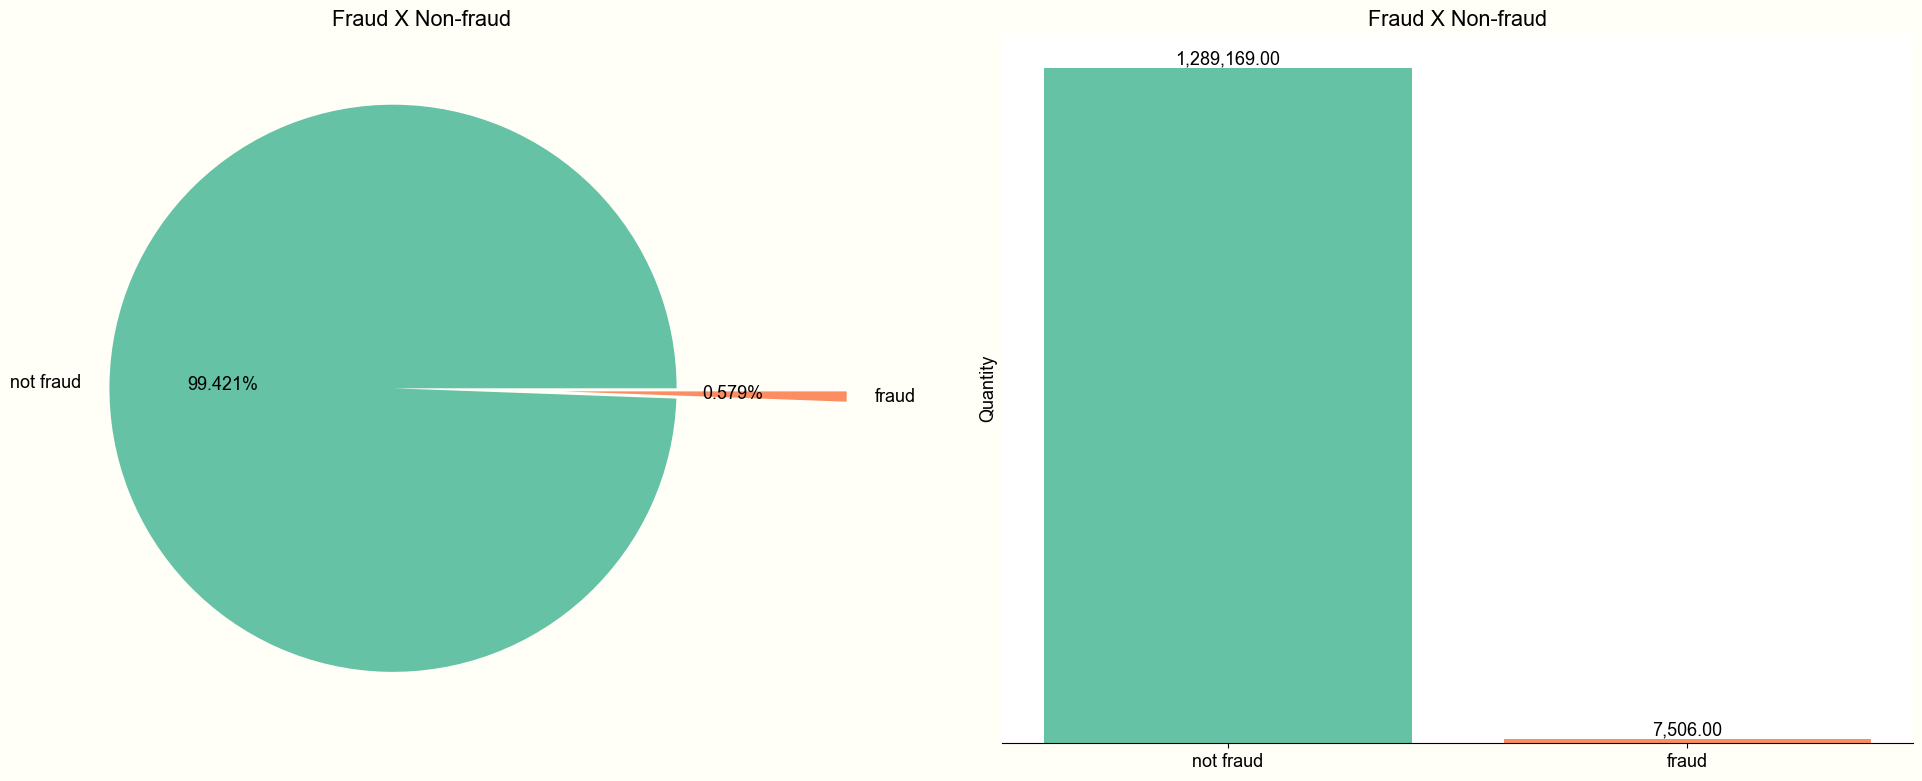

In [69]:
pie_bar_plot(data=df_desc, var='is_fraud', title='Fraud X Non-fraud')

The dataset is heavily imbalanced (only 0.58% of positive samples), we might have to use some sampling techniques to deal with this.

# 3.0 Feature Engineering
<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">

<font align="center" color='white'>
    <h1/></h1>
</font>

</div>

In [70]:
df_eng = df_desc.copy()

### Hypothesis

**Customers**

H1: Customers with more than 60 years are more susceptible to fraud.

H2: The fraud rate is the same for all Cities.

H3: Men are more susceptible to fraud.

H4: We can't observe a difference in fraud rate across professions.

**Transaction**

H5: The average amount involved in a fraud is 20% higher than the average amount in legitimate transactions.

H6: The fraud rate increases as the difference between the amount and the median amount (for a client) increases.

H7: There is no difference between segments regarding fraud rate.

H8: Frauds occur more on credit transactions than on debit transactions.

H9: Fraudulent transactions are more common in large cities.

H10: Transactions on which the distance between the customer and the merchant is higher than 100 kilometers have a fraud rate 15% greater than the overall fraud rate.

**Institution**

H11: The current System has an accuracy of 80%.

**Fraud Type**

H12: Card-not present is the most commom type of fraud.

H13: Credit card application fraud is responsible for 20% of the total amount in fraudulent transactions.

**Time**

H14: 40% of the fraud transactions occurs at night.

In [74]:
def feature_engineering(df):


    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])

    df['age'] = ((df['trans_date_trans_time'].max() - df['dob']).dt.days/365).astype(int)

    df['over_60_years'] = df['age'].apply(lambda x: 'No' if x < 60 else 'Yes')

    amount_avg_by_person = df.groupby(['first', 'last']).median(numeric_only=True)[['amt']].reset_index().rename(columns={'amt': 'median_amount'})

    df = pd.merge(df, amount_avg_by_person, on=['first', 'last'], how='left')

    df['amount_diff_from_median'] = (df['amt'] - df['median_amount'])

    df['amount_diff_from_median_perc'] = (df['amt'] - df['median_amount'])/df['median_amount']

    df['city_size'] = df['city_pop'].apply(lambda x: city_size_by_pop(x))
    
    df['day_time'] = df['trans_date_trans_time'].apply(lambda x: times_of_day(x.hour))

    df['distance'] = df[['lat', 'long', 'merch_lat', 'merch_long']].apply(lambda x: great_circle((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis=1)
    
    
    return df

In [75]:
feat_eng = pp.FunctionTransformer(feature_engineering)

# 4.0 Exploratory Data Analysis
<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">

<font align="center" color='white'>
    <h1/></h1>
</font>

</div>

In [76]:
# creating the new features with feature engineering transformer.
df_eda = feat_eng.fit_transform(df_eng.copy())

In [77]:
df_eda.select_dtypes(include=[object]).head()#.columns

,merchant,category,first,last,gender,street,city,state,zip,job,trans_num,over_60_years,city_size,day_time
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,No,micro,morning
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,No,micro,morning
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,No,micro,morning
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,No,micro,morning
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,No,micro,morning


## 4.1 Univariate Analysis

### Numerical

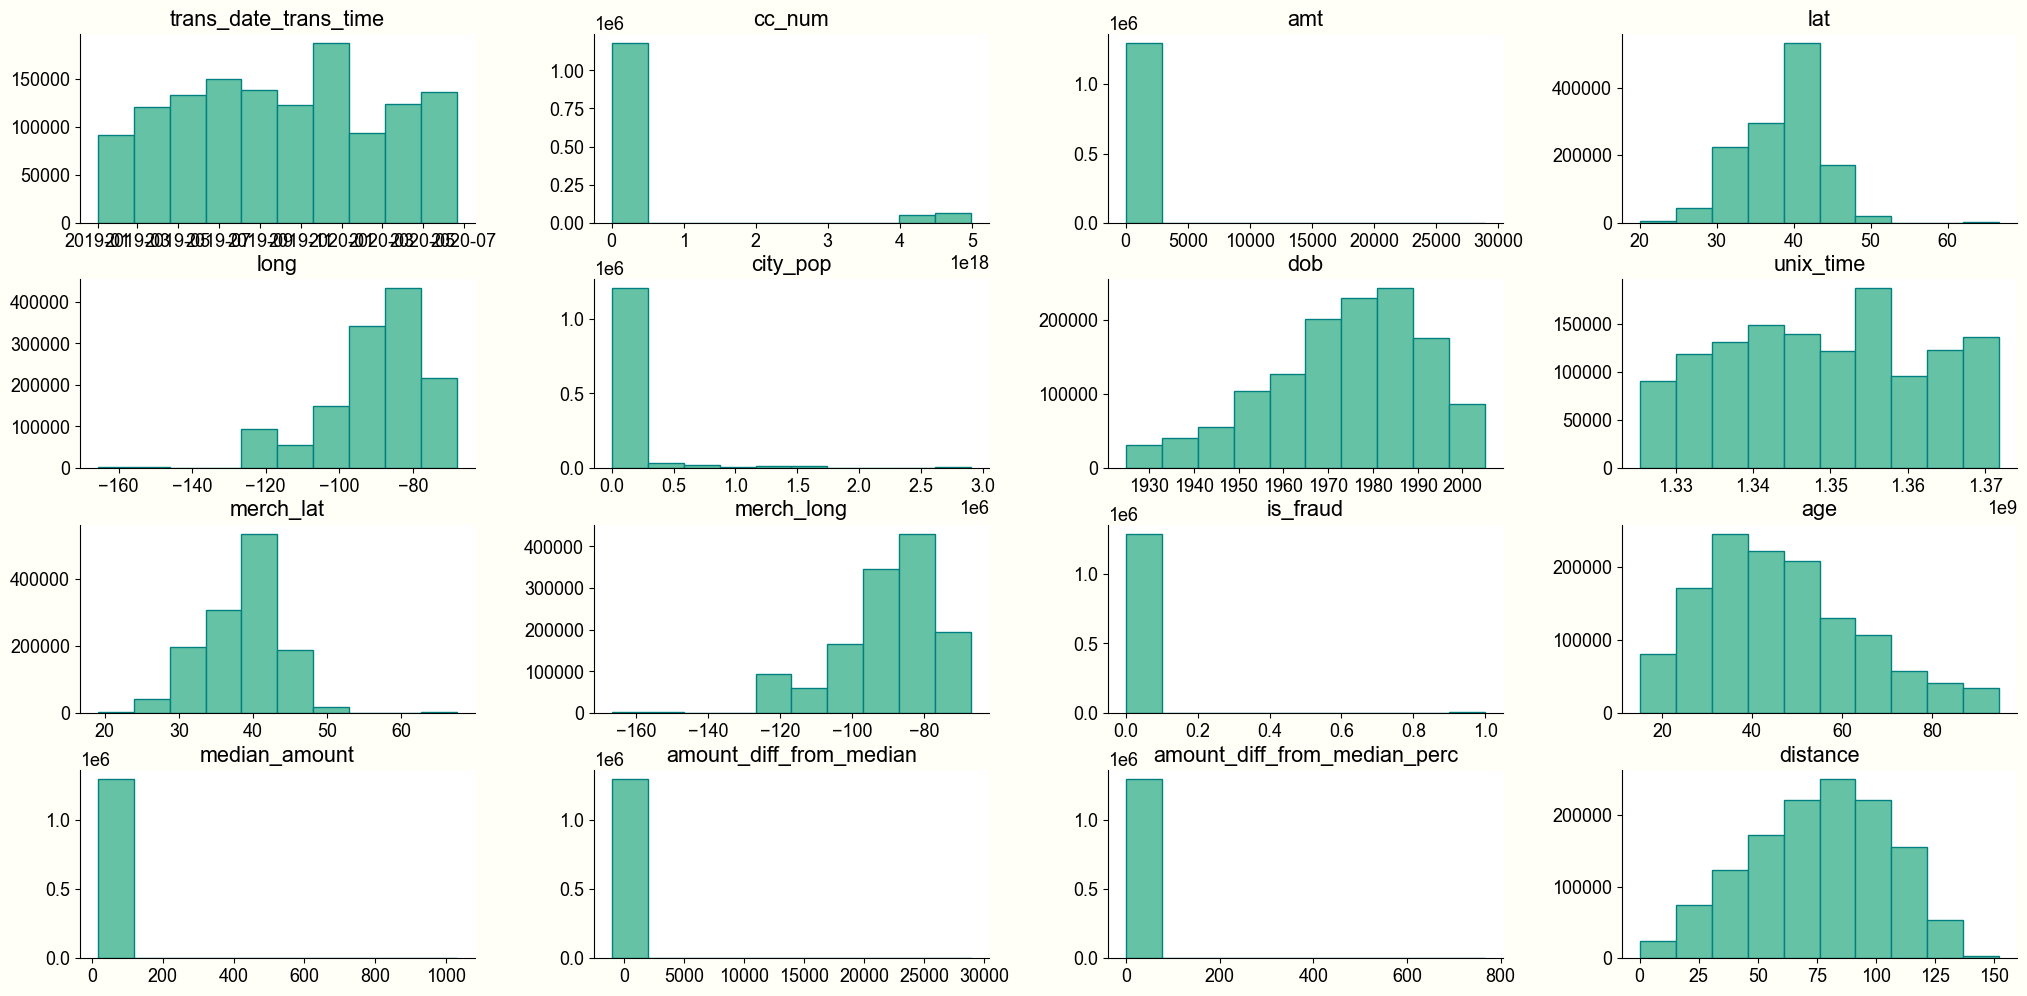

In [78]:
df_eda.hist(grid=False, color=colors[0], ec='teal', figsize=(25, 12));

### Categorical

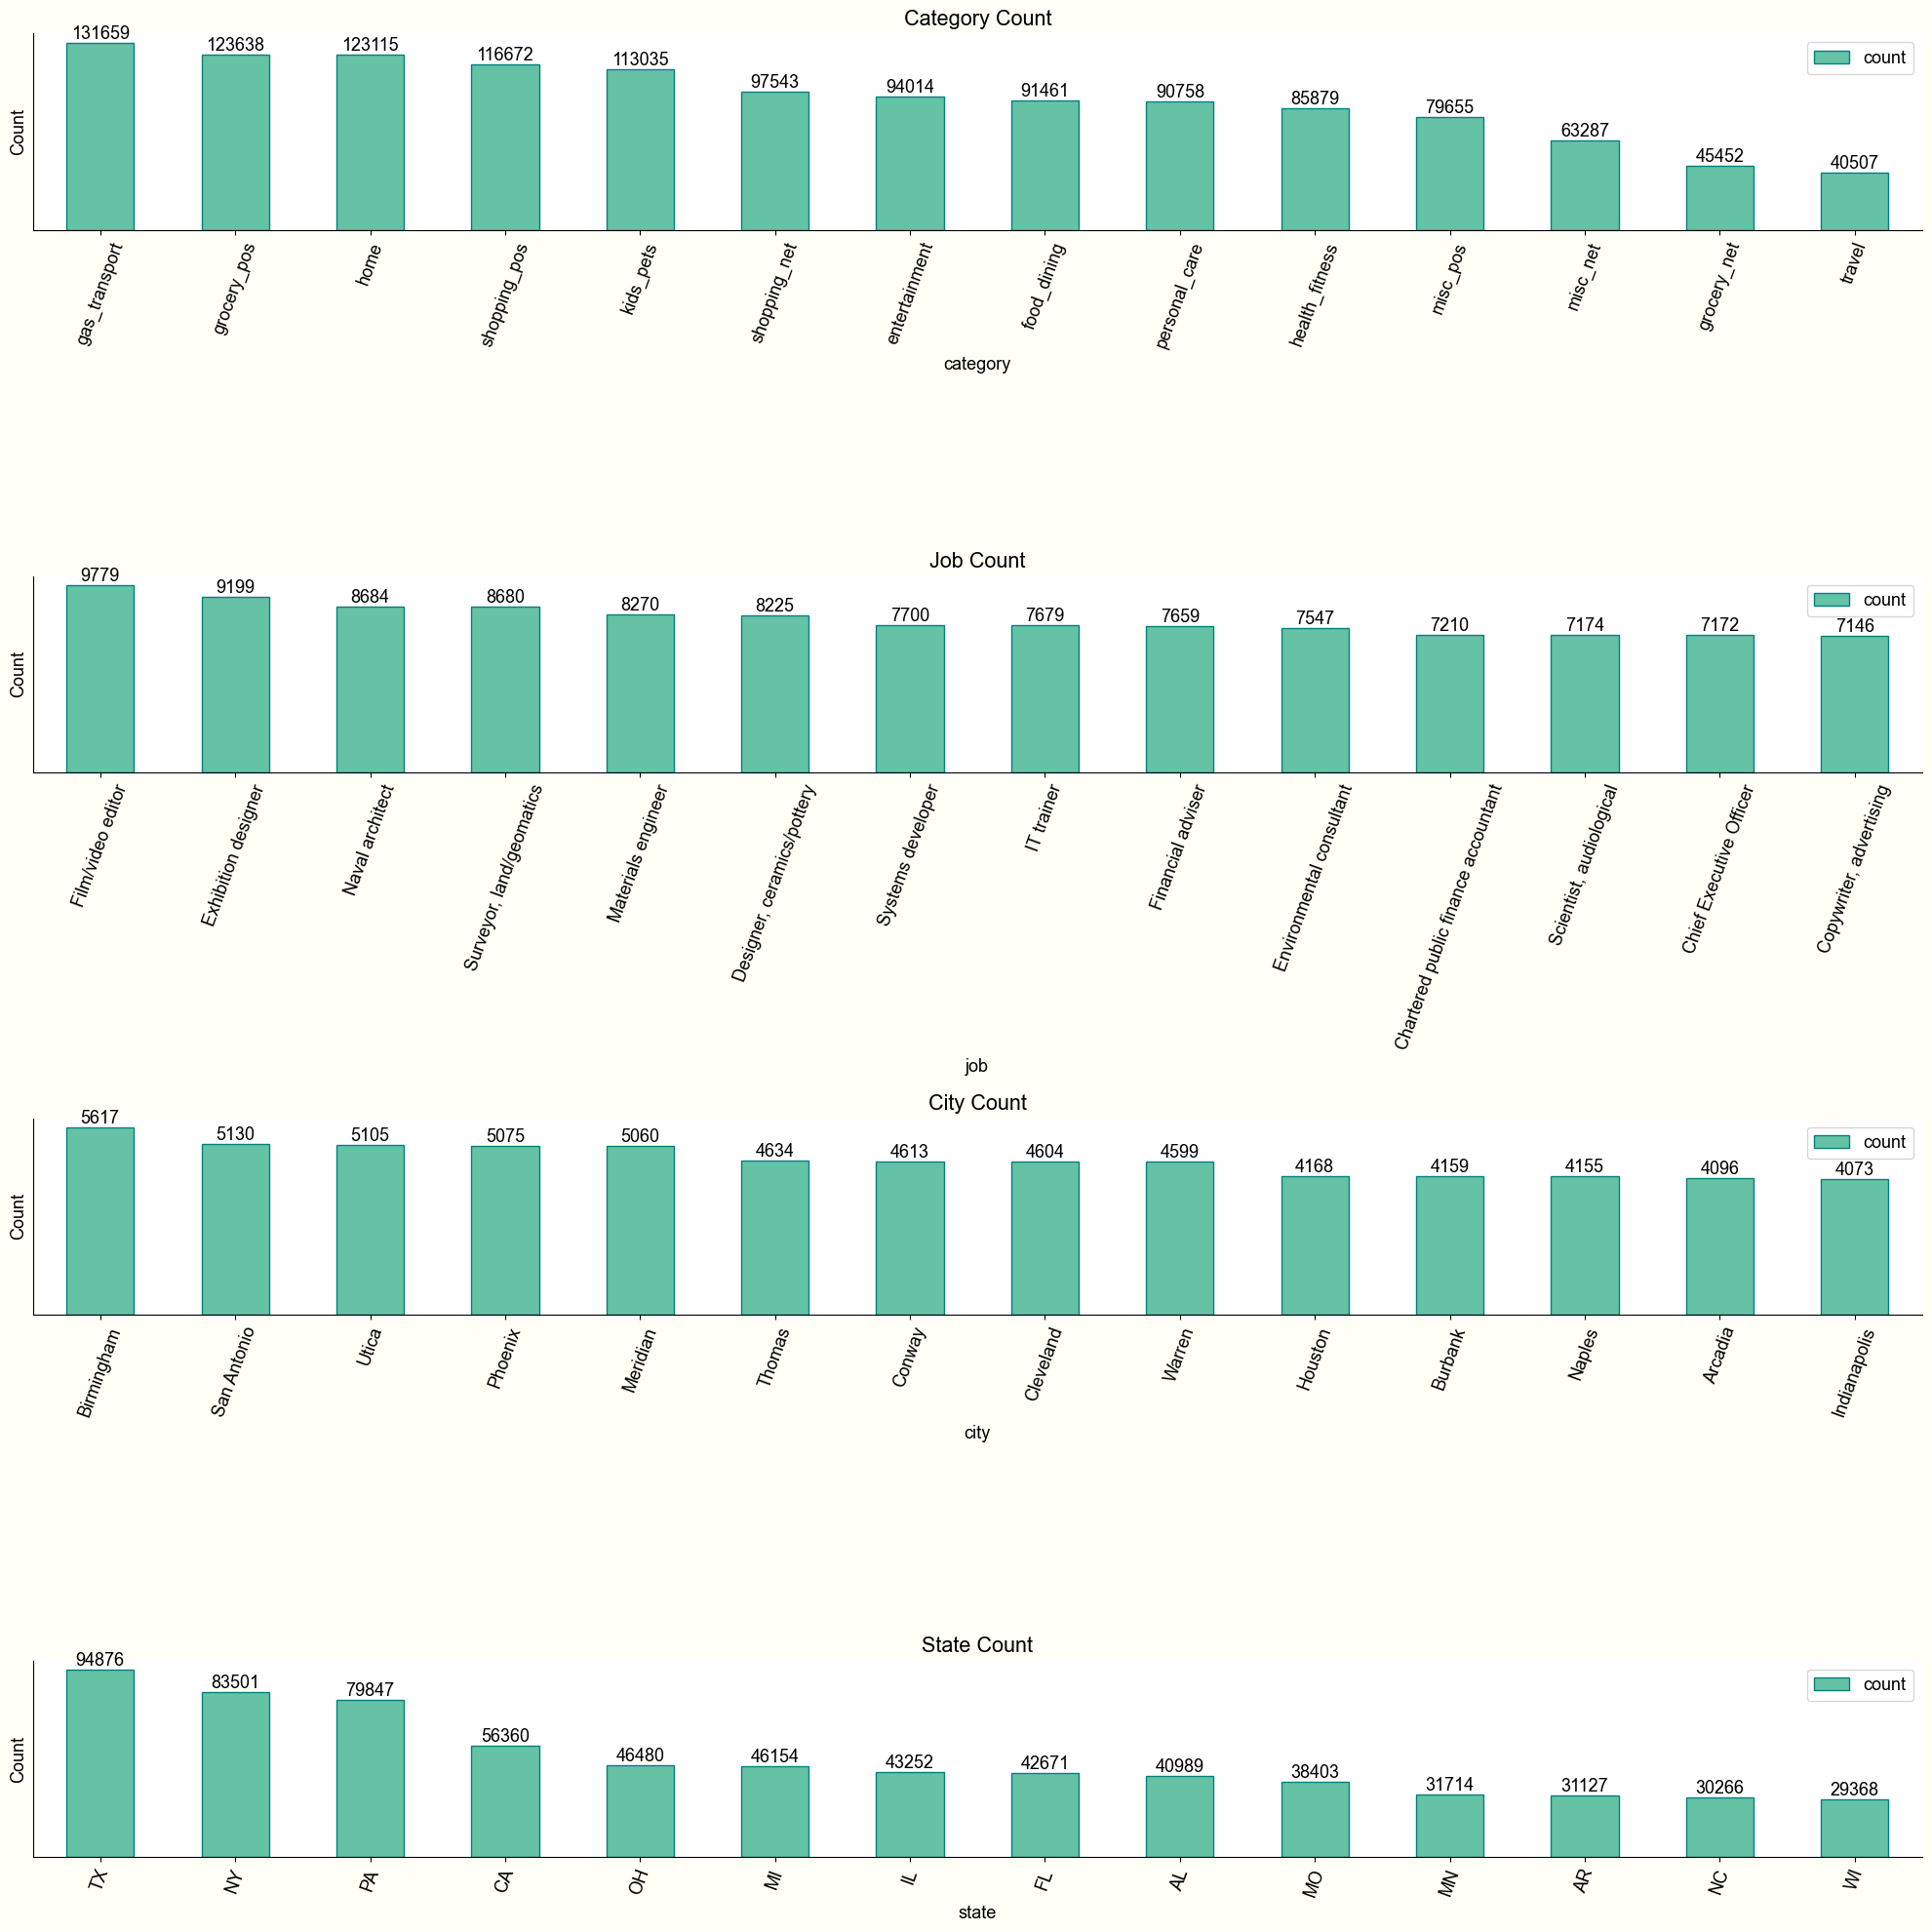

In [79]:
_, ax = plt.subplots(4, 1, figsize=(20, 20))
count_plots(df=df_eda, agg_column='category', ref_column='cc_num', color=colors[0], ax=ax[0])
count_plots(df=df_eda, agg_column='job', ref_column='cc_num', color=colors[0], ax=ax[1])
count_plots(df=df_eda, agg_column='city', ref_column='cc_num', color=colors[0], ax=ax[2])
count_plots(df=df_eda, agg_column='state', ref_column='cc_num', color=colors[0], ax=ax[3])
plt.tight_layout()

The states with most transactions are Texas, New York, Pennsylvania, California, Ohio, Michigan, Illinois, Florida, Alabama and Missouri.

The top 5 categories are gas_transport, grocery, home, shopping_pos, ad kids_pets.

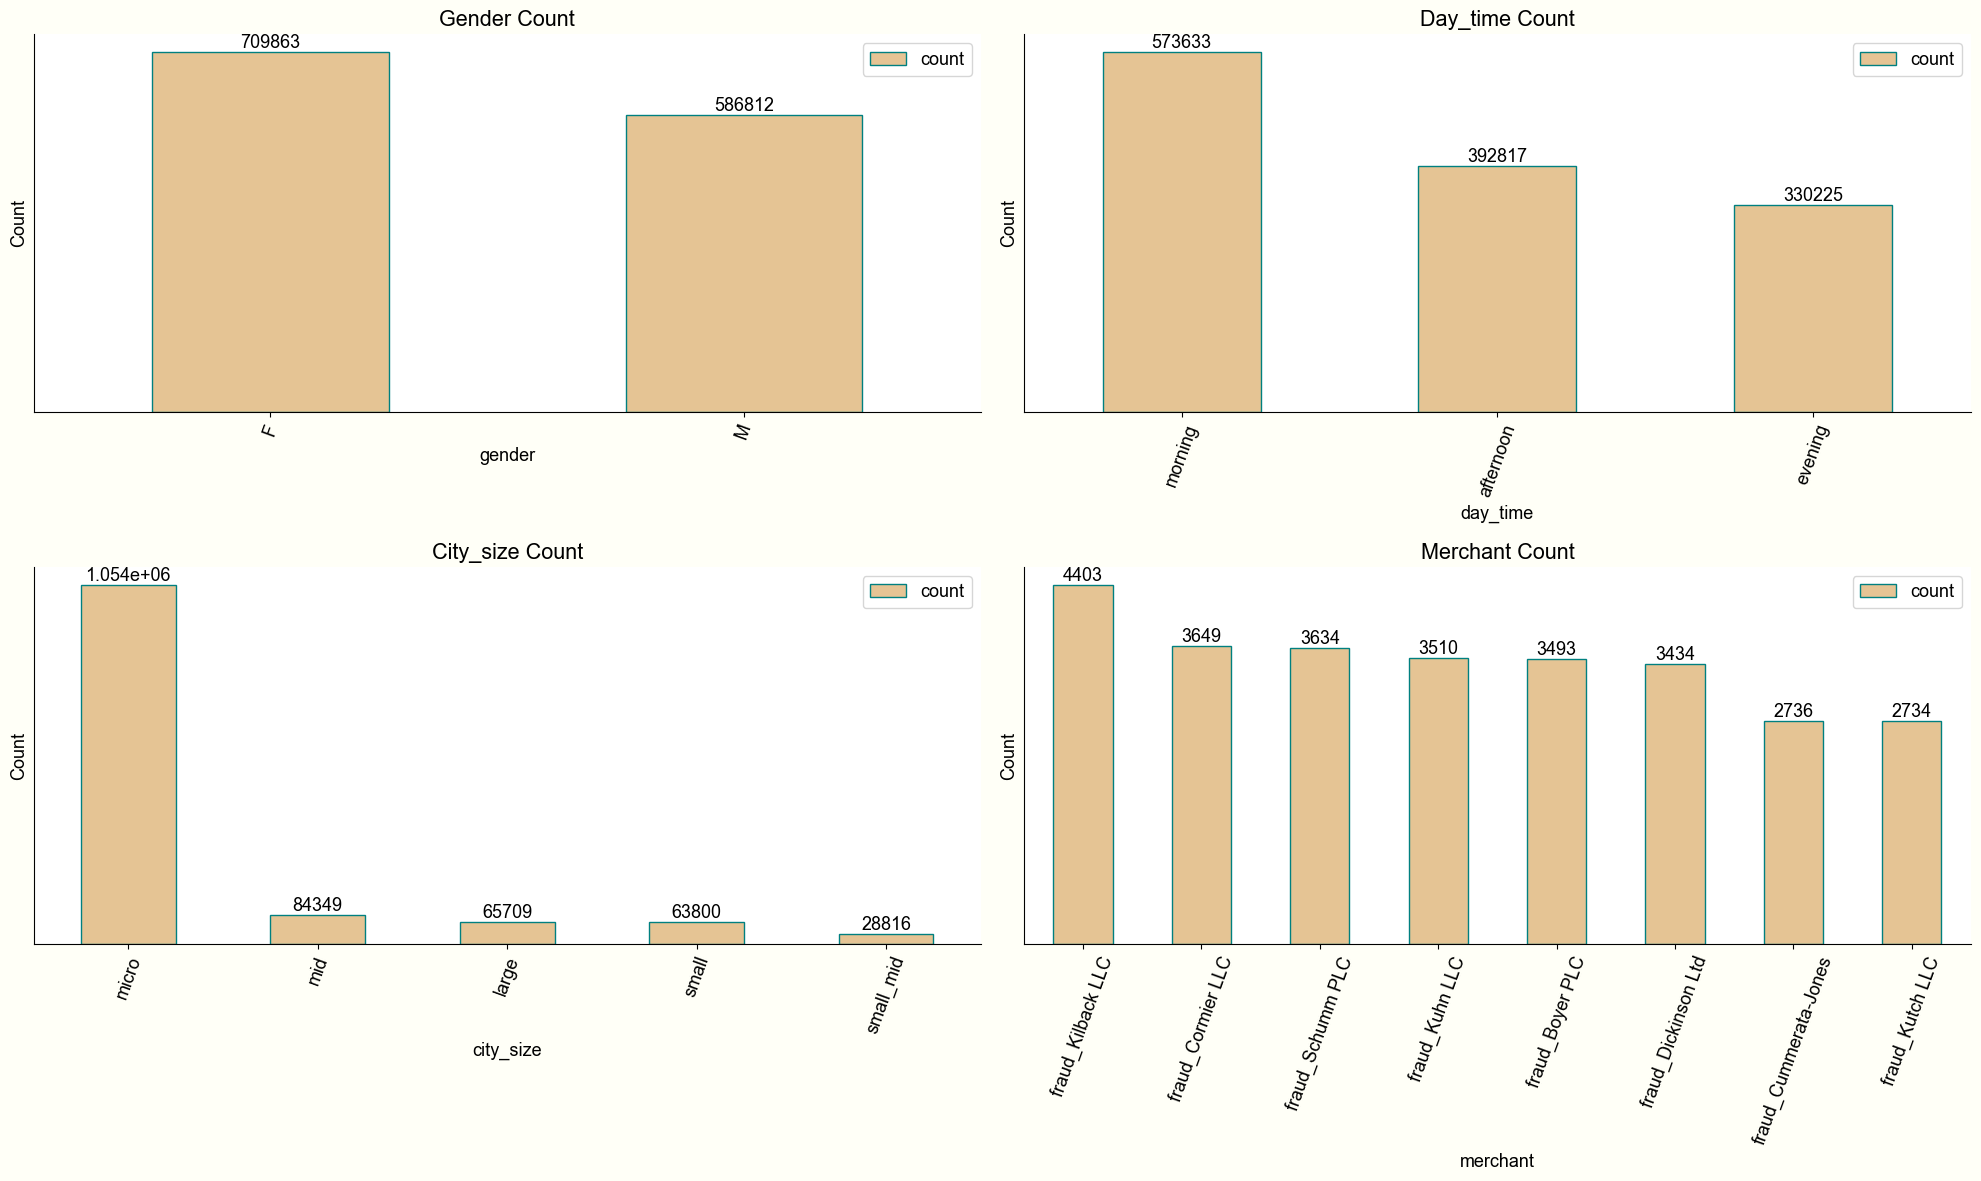

In [81]:
_, ax = plt.subplots(2, 2, figsize=(20, 12))
count_plots(df=df_eda, agg_column='gender', ref_column='cc_num', color=colors[6], ax=ax[0][0])
count_plots(df=df_eda, agg_column='day_time', ref_column='cc_num', color=colors[6], ax=ax[0][1])
count_plots(df=df_eda, agg_column='city_size', ref_column='cc_num', color=colors[6], ax=ax[1][0])
count_plots(df=df_eda, agg_column='merchant', ref_column='cc_num', color=colors[6], ax=ax[1][1], num=8)
plt.tight_layout()

There are more female transactions.

Most transactions occur at the morning period.

Most cities are micro (less than 50,000 habitants).

In [138]:
states1 = ['OH', 'KY', 'NY', 'WI', 'AL', 'MA', 'PA', 'IL', 'AR', 'WA', 'MO',
'MS', 'MN', 'MI', 'UT', 'NC', 'HI', 'WV', 'NE', 'TX', 'MD', 'NJ']

states2 = ['KS', 'MT', 'GA', 'DC', 'SD', 'NM', 'CA', 'OR', 'VA', 'TN', 'FL',
       'SC', 'OK', 'AZ', 'IA', 'WY', 'LA', 'IN', 'VT', 'ME', 'NH', 'ID',
       'ND', 'CO', 'NV',  'AK', 'CT', 'RI', 
       #'DE'
       ]

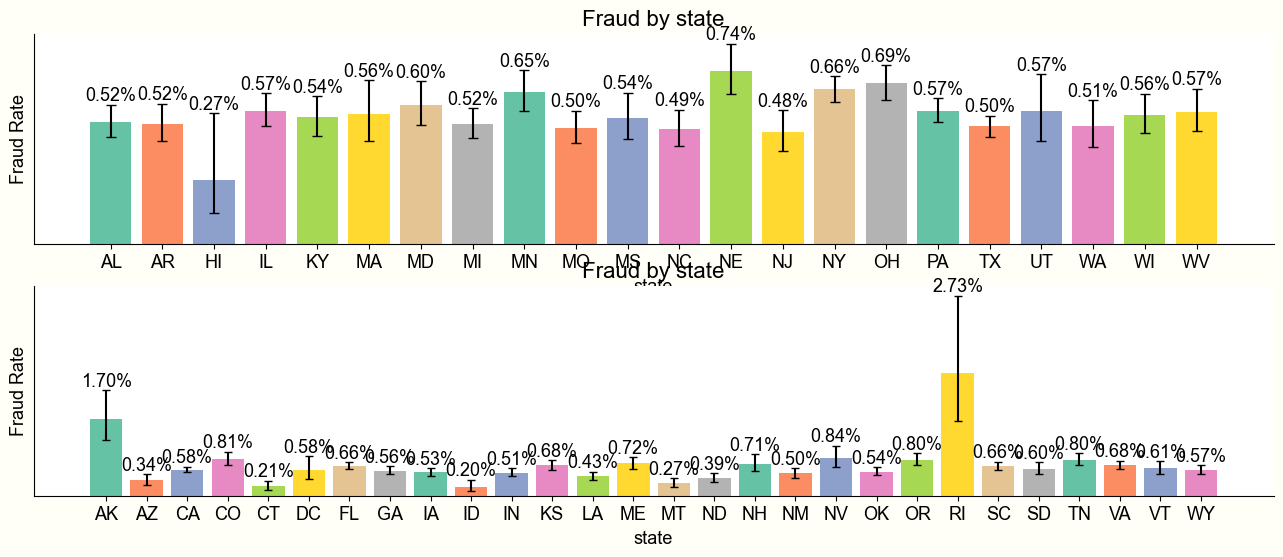

In [139]:
_, ax = plt.subplots(2, 1, figsize=(16, 6))
cohort_plot_cat(df=df_eda.query(f'state.isin({states1})'), cat_col='state', target='is_fraud', transform=True, ax=ax[0])
cohort_plot_cat(df=df_eda.query(f'state.isin({states2})'), cat_col='state', target='is_fraud', transform=True, ax=ax[1])

## Time

In [86]:
df_aux = df_eda.copy() #.head()
df_aux = df_aux.set_index('trans_date_trans_time')

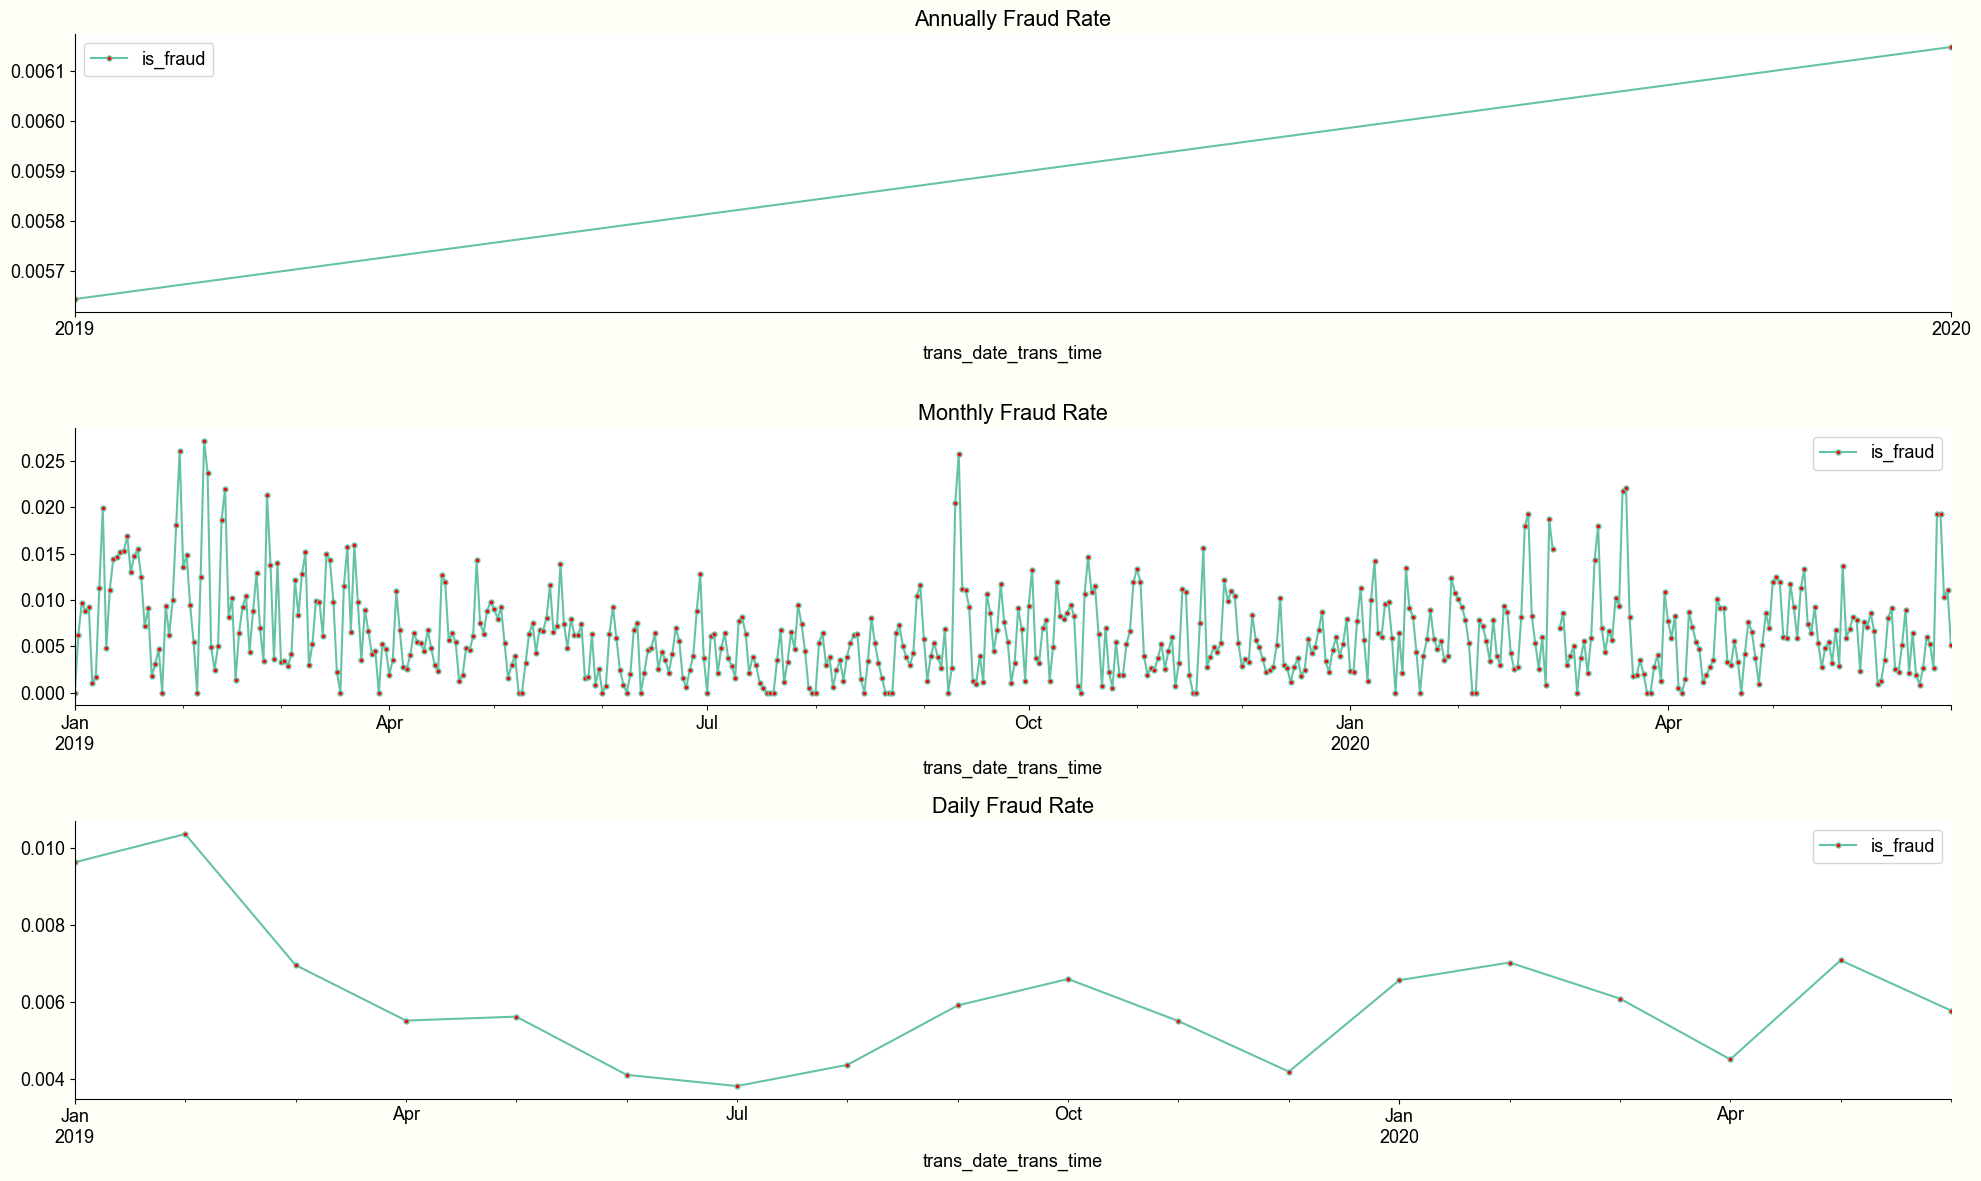

In [87]:
_, ax = plt.subplots(3, 1, figsize=(20, 12))
df_aux[['is_fraud']].resample('A').mean().plot(color=colors[0], marker='o', markersize=3.5, markerfacecolor='red', ax=ax[0], title='Annually Fraud Rate')
df_aux[['is_fraud']].resample('D').mean().plot(color=colors[0], marker='o', markersize=3.5, markerfacecolor='red', ax=ax[1], title='Monthly Fraud Rate')
df_aux[['is_fraud']].resample('M').mean().plot(color=colors[0], marker='o', markersize=3.5, markerfacecolor='red', ax=ax[2], title='Daily Fraud Rate')
plt.tight_layout();

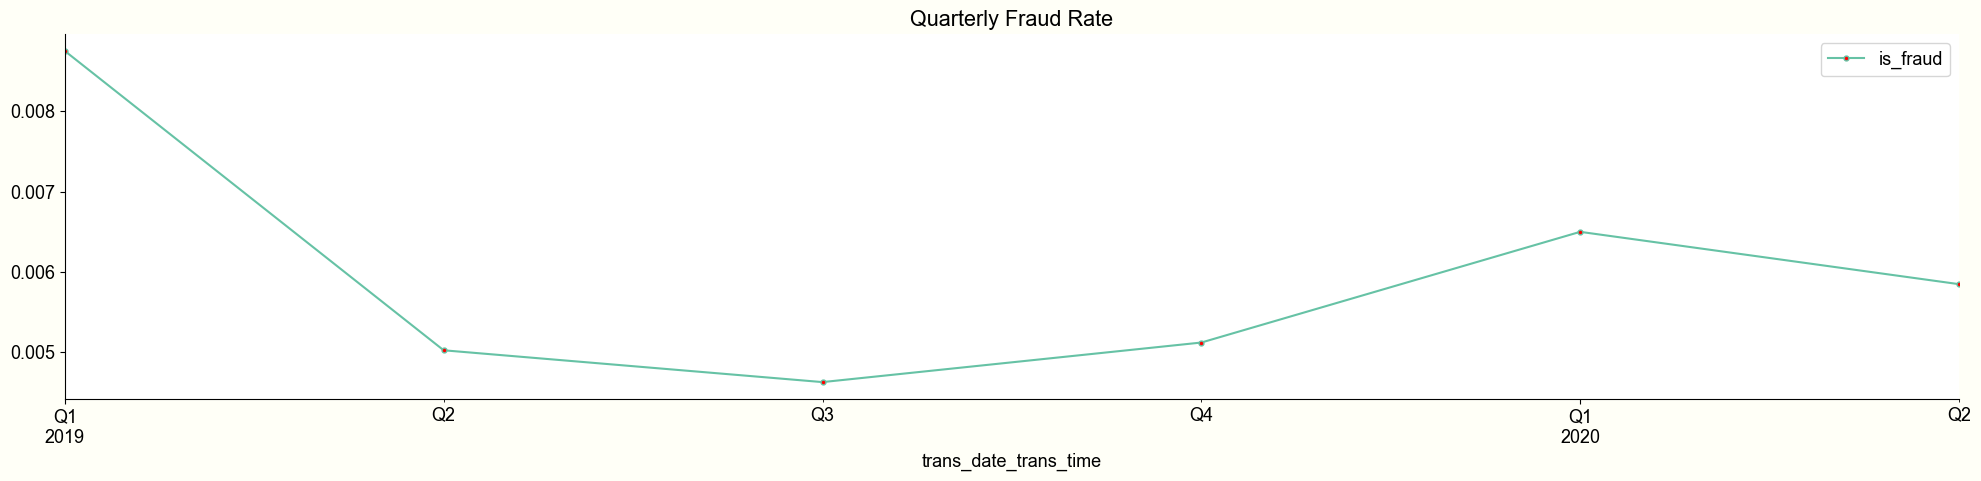

In [88]:
_, ax = plt.subplots(1, 1, figsize=(20, 5))
df_aux[['is_fraud']].resample('Q').mean().plot(color=colors[0], marker='o', markersize=3.5, markerfacecolor='red', ax=ax, title='Quarterly Fraud Rate')

plt.tight_layout();

In [90]:
fraud_elder_victims = df_aux.query('is_fraud == 1 & age >= 60').cc_num.unique()
fraud_midage_victims = df_aux.query('is_fraud == 1 & (age < 60 and age >= 35)').cc_num.unique()
fraud_young_victims = df_aux.query('is_fraud == 1 & (age < 35)').cc_num.unique()

In [142]:
#freq_fraud_plot(vit_list=fraud_elder_victims, df_aux=df_aux, title='Transaction frequency x Fraud (elder)')
#freq_fraud_plot(vit_list=fraud_midage_victims, df_aux=df_aux, title='Transaction frequency x Fraud (middle age)')
#freq_fraud_plot(vit_list=fraud_young_victims, df_aux=df_aux, title='Transaction frequency x Fraud (young adult)');

In [ ]:
# Add comment about the plot

## 4.2 Bivariate Analysis

**H1: Customers with more than 60 years are more susceptible to fraud.**

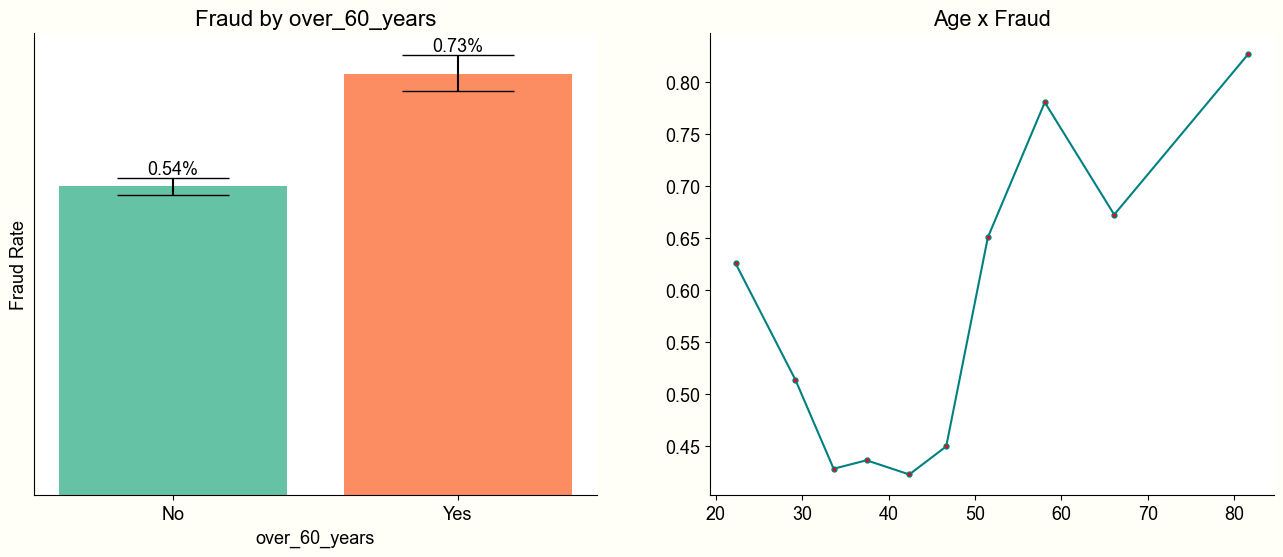

In [97]:
_, ax = plt.subplots(1, 2, figsize=(16, 6))
cohort_plot_cat(df=df_eda, cat_col='over_60_years', target='is_fraud', transform=True, ax=ax[0])
cohort_plot(df=df_eda, num_var='age', response='is_fraud', ax=ax[1])

**True:** The fraud rate is 35.18% higher for people above 60 than for younger people.

Obs: The age range with the lowest fraud rate is [mid 30 - mid 40].

**H2: Men are more susceptible to fraud.**

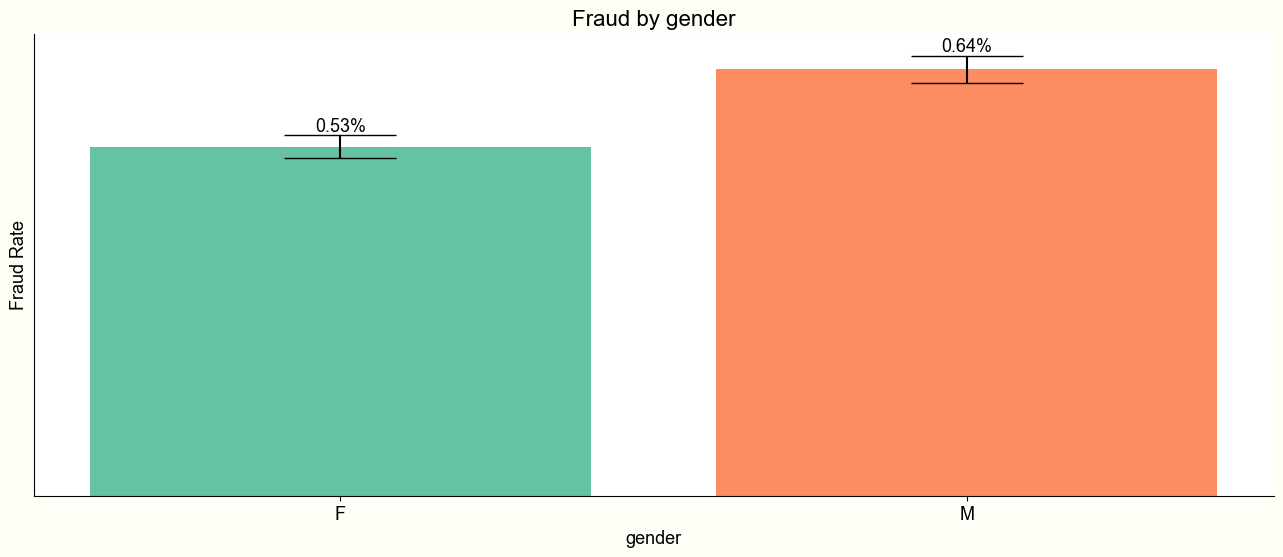

In [98]:
_, ax = plt.subplots(1, 1, figsize=(16, 6))
cohort_plot_cat(df=df_eda, cat_col='gender', target='is_fraud', transform=True, ax=ax)

**True:** In this dataset, we have a higher fraud rate amongst men.

**H3: We can't observe a difference in fraud rate across professions.**

In [122]:
professions = df_eda.groupby('job').count().sort_values('cc_num', ascending=False).head(30).index.to_list()

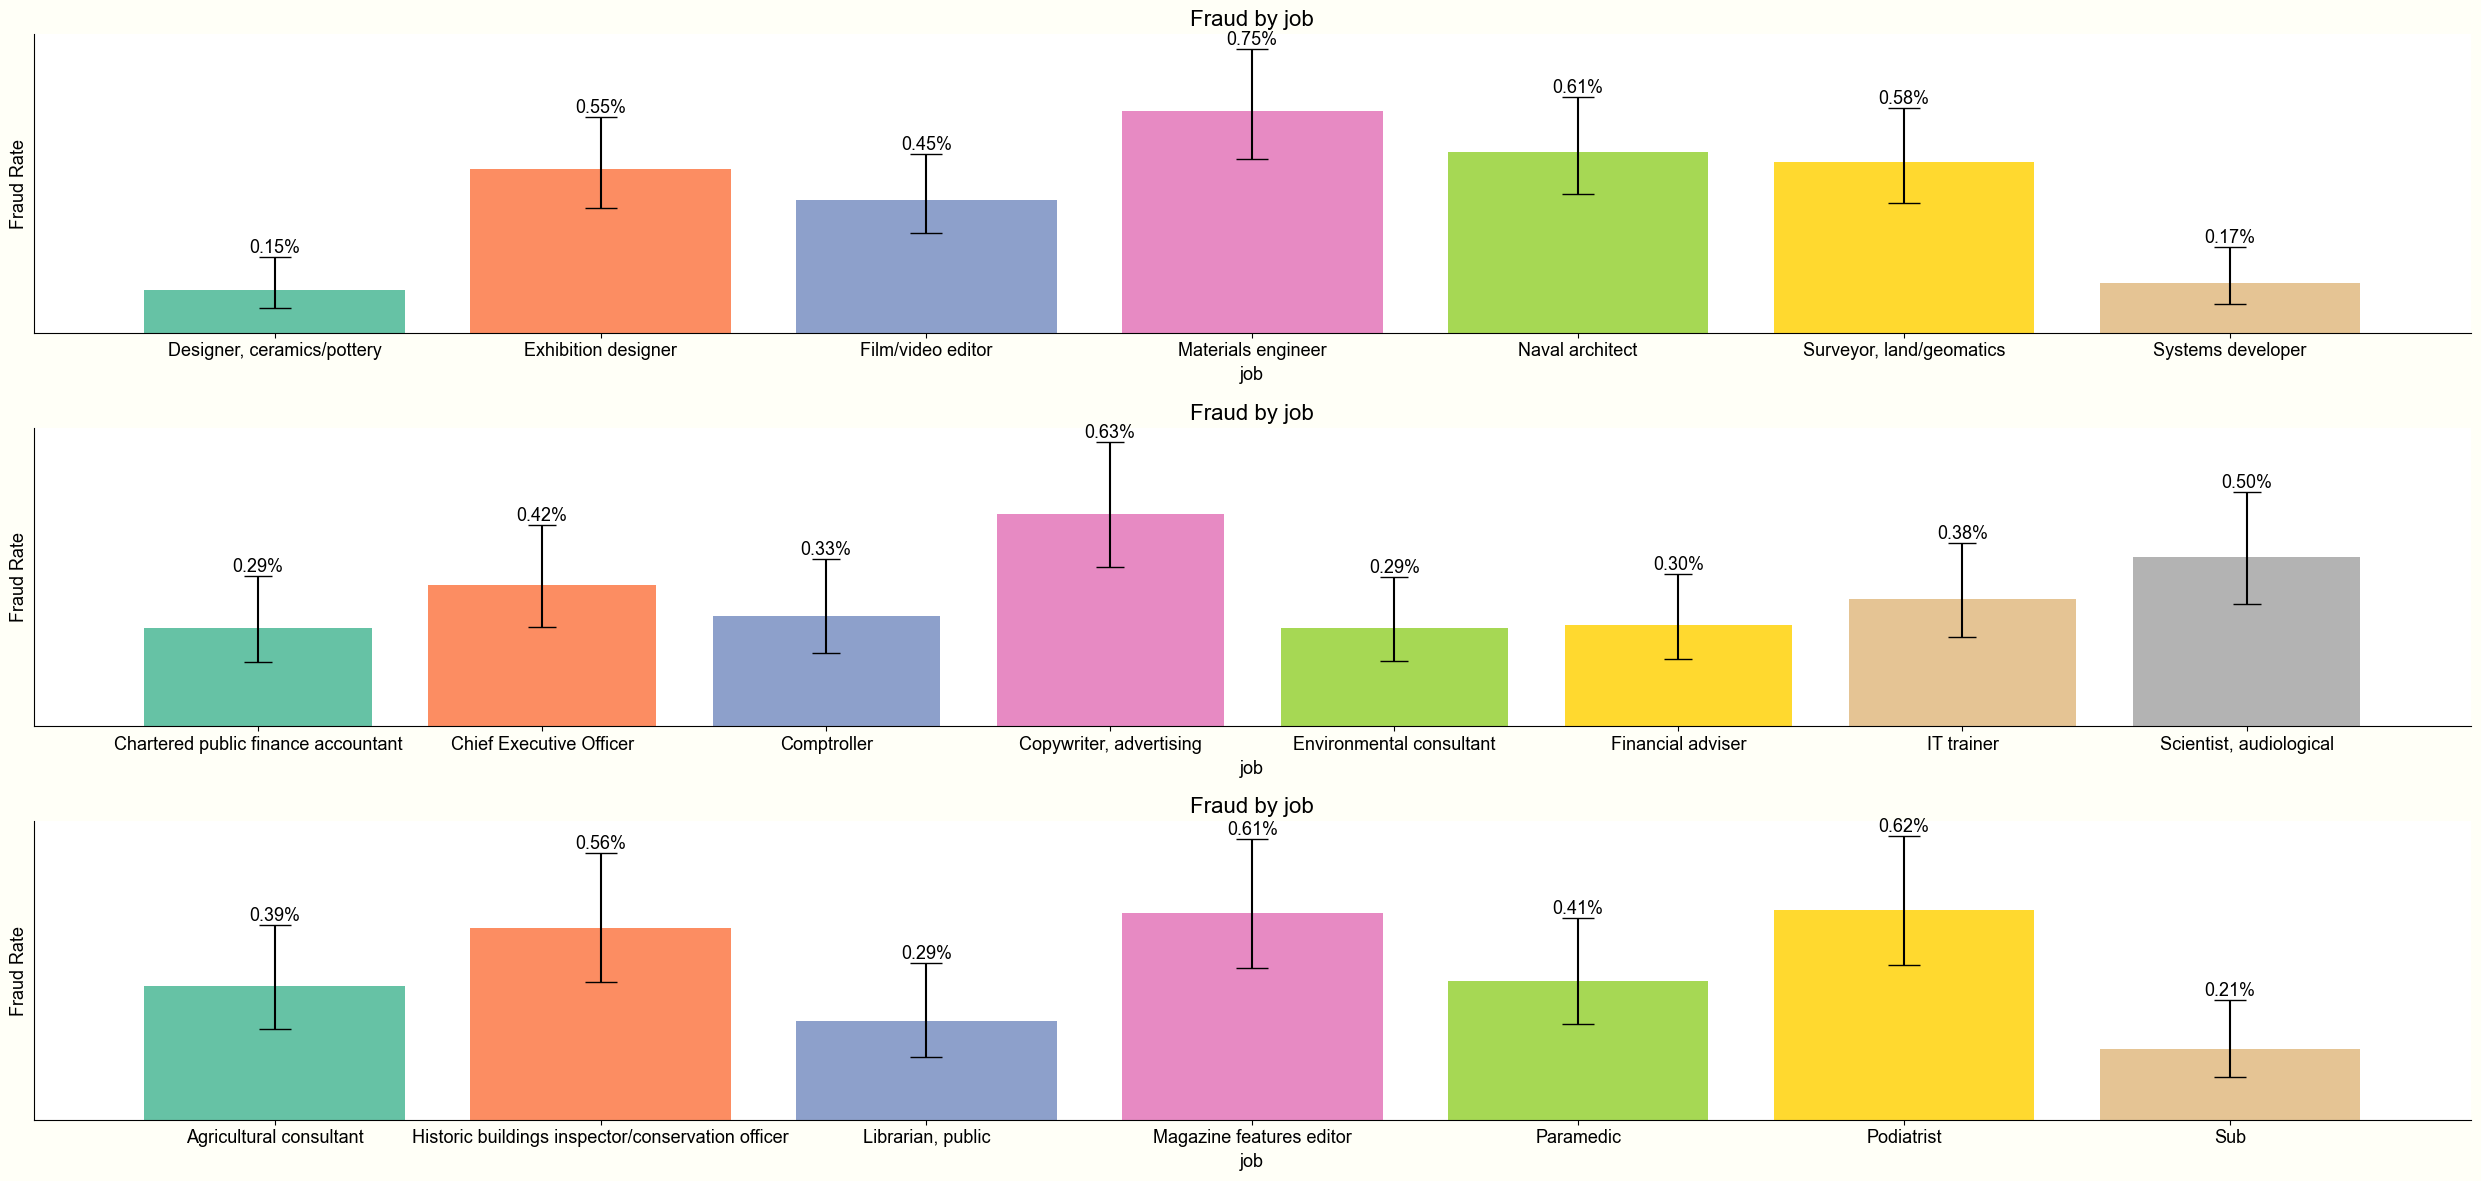

In [ ]:
_, ax = plt.subplots(3, 1, figsize=(25, 12))
cohort_plot_cat(df=df_eda.query(f'job.isin({professions[:7]})'), cat_col='job', target='is_fraud', transform=True, ax=ax[0])
cohort_plot_cat(df=df_eda.query(f'job.isin({professions[7:15]})'), cat_col='job', target='is_fraud', transform=True, ax=ax[1])
cohort_plot_cat(df=df_eda.query(f'job.isin({professions[15:22]})'), cat_col='job', target='is_fraud', transform=True, ax=ax[2])
plt.tight_layout()

**False**: We observe a lot of variation on the fraud rate accross professions.

**H4: The median amount involved in a fraud is 20% higher than the median amount on legitimate transactions.**

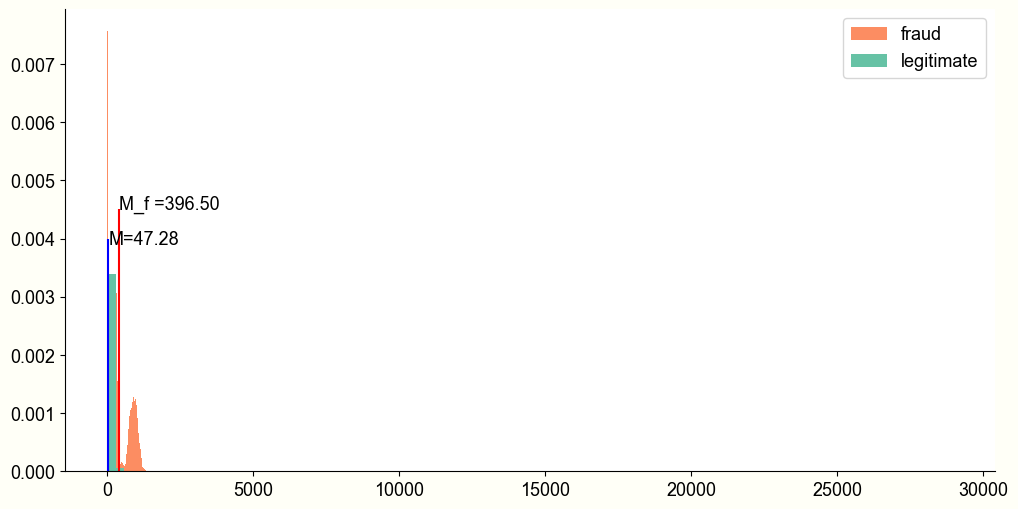

In [103]:
avg_fraud = df_eda.query('is_fraud == 1').amt.median()
avg_no_fraud = df_eda.query('is_fraud == 0').amt.median()
plt.figure(figsize=(12, 6))
plt.hist(x=df_eda.query('is_fraud == 1')['amt'], label='fraud', bins=50, density=True, color=colors[1])
plt.hist(x=df_eda.query('is_fraud == 0')['amt'], label='legitimate', bins=100, density=True, color=colors[0])

plt.vlines(x=avg_fraud, ymin=0, ymax=4.5e-3, colors='red')
plt.vlines(x=avg_no_fraud, ymin=0, ymax=4e-3, colors='blue')

plt.text(x=avg_fraud, y=4.5e-3, s=fr'M_f ={avg_fraud:,.2f}')
plt.text(x=avg_no_fraud, y=3.9e-3, s=fr'M={avg_no_fraud:,.2f}')
plt.legend();

In [104]:
print(f'False: The median amount in a fraudulent transaction is {(396.50-47.28)/47.28:.2%} bigger than the median amount of a legitimate transaction.')

False: The median amount in a fraudulent transaction is 738.62% bigger than the median amount of a legitimate transaction.


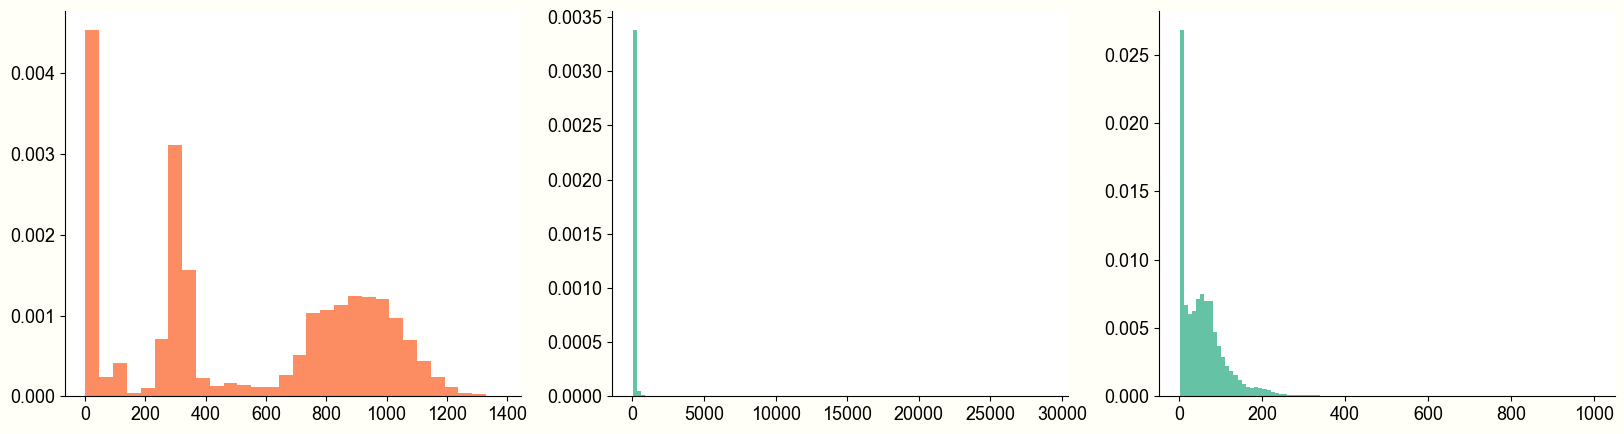

In [105]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(x=df_eda.query('is_fraud == 1')['amt'], label='fraud', bins=30, density=True, color=colors[1])
plt.subplot(1, 3, 2)
plt.hist(x=df_eda.query('is_fraud == 0')['amt'], label='legitimate', bins=100, density=True, color=colors[0]);
plt.subplot(1, 3, 3)
plt.hist(x=df_eda.query('is_fraud == 0 & amt < 1000')['amt'], label='legitimate', bins=100, density=True, color=colors[0]);
#sns.boxplot(data=df_eda.query('is_fraud == 0 & amount < 2000')['amount'], x='amount', y='is_fraud', color=colors[0]);

With these plots, we can see that the legitimate transaction's amount is highly concentrated on small values with a few big amounts. On the other hand, the amount distribution of fraudulent transaction are not very concentrated, but the most frequent values are higher than those in the legimate distribution.


might need to rephrase this.

**H5: The fraud rate increases as the difference between the amount and the median amount (for a client) increases.**

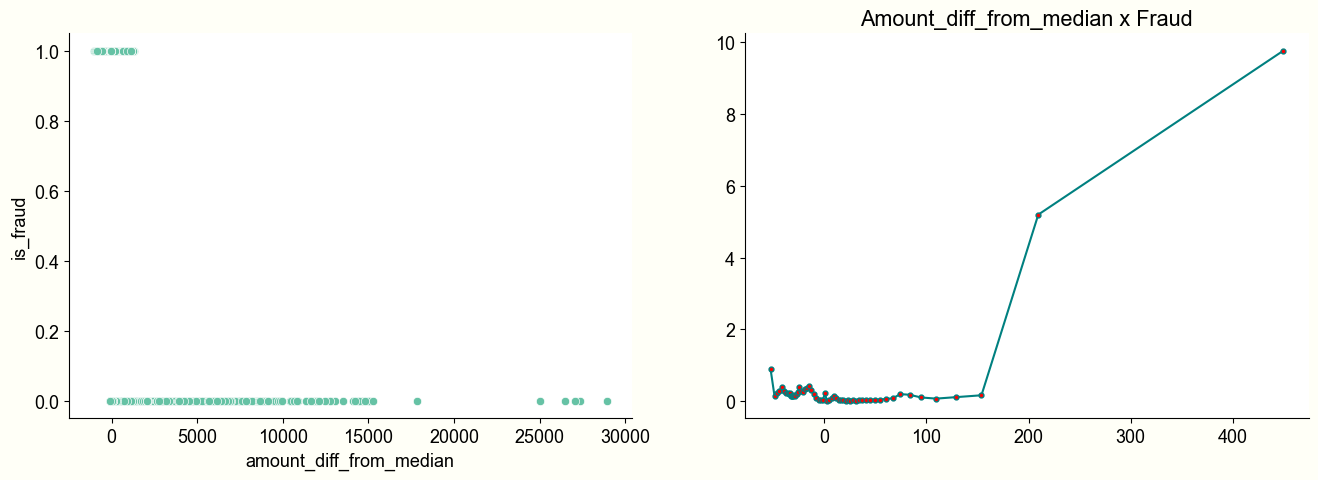

In [106]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(data=df_eda, x='amount_diff_from_median', y='is_fraud', color=colors[0], ax=ax[0])
cohort_plot(df=df_eda.query('amount_diff_from_median > -200 & amount_diff_from_median < 800'), num_var='amount_diff_from_median', response='is_fraud', ax=ax[1], q=60);

**True:** The fraud rate increases as the amount difference increases, but for most part of the graphic in don't see a trend and fraud rate stay stable untill it has a spike around the 200 (bucket) mark. In addition, by we can observe on the plot on the left side that there are no fraudulent transaction with extremely high amount differnce.

**H6: There is no difference between segments regarding fraud rate.**

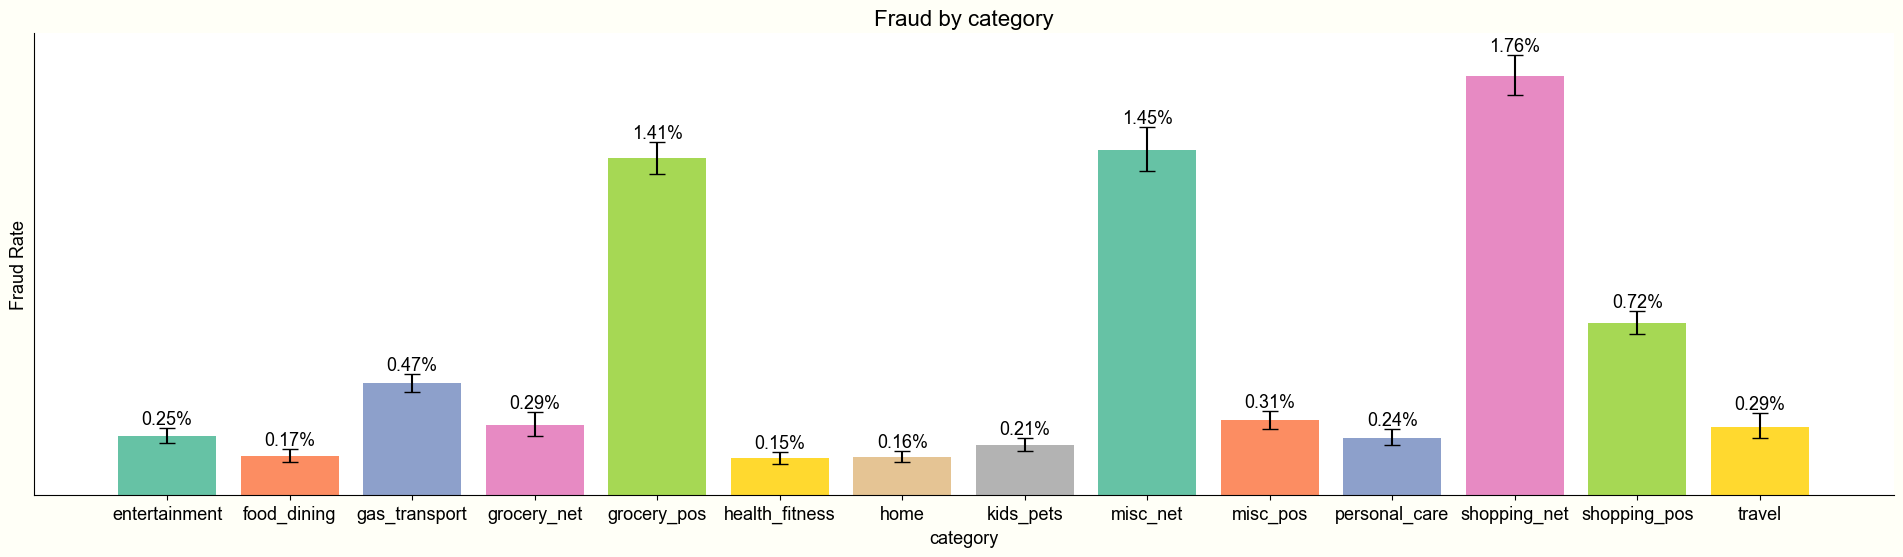

In [107]:
_, ax = plt.subplots(1, 1, figsize=(24, 6))
cohort_plot_cat(df=df_eda, cat_col='category', target='is_fraud', transform=True, ax=ax)

**False:** Some segments have a higher fraud rate (misc net, grocery pos, shopping net).

**H7: Fraudulent transactions are more common in large cities.**

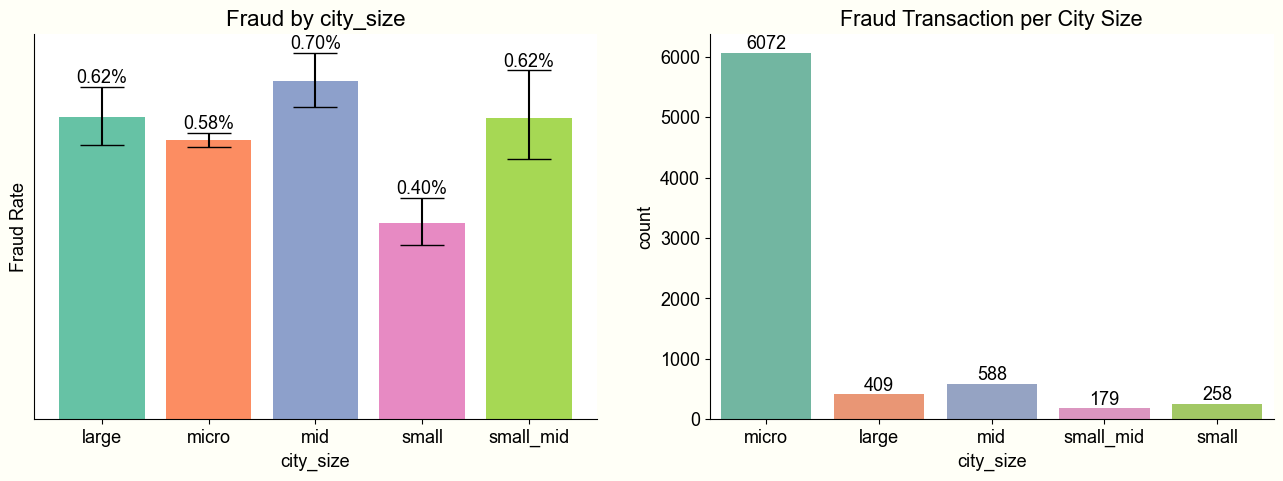

In [108]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
cohort_plot_cat(df=df_eda, cat_col='city_size', target='is_fraud', transform=True, ax=ax[0])
bar = sns.countplot(data=df_eda.query('is_fraud == 1'), x='city_size', palette=colors, hue_order=['large', 'micro', 'mid', 'small', 'small_mid'])
ax[1].bar_label(bar.containers[0])
ax[1].set_title('Fraud Transaction per City Size');

**False**: The fraud rate is higher on mid sized cities, but the difference between the top 3 is not significant.

**H8: Transactions on which the distance between the customer and the merchant is higher than 100 kilometers have a fraud rate 15% greater than the overall fraud rate.**

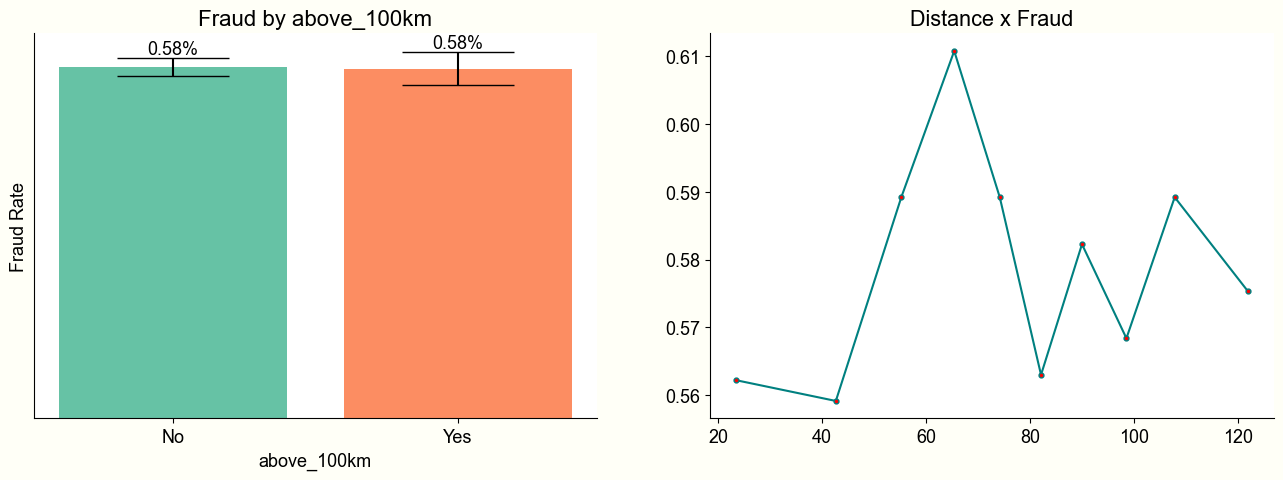

In [109]:
df_aux = df_eda.copy()

df_aux['above_100km'] = df_aux['distance'].apply(lambda x: 'No' if x < 100 else 'Yes')

_, ax = plt.subplots(1, 2, figsize=(16, 5))
cohort_plot_cat(df=df_aux, cat_col='above_100km', target='is_fraud', transform=True, ax=ax[0])
cohort_plot(df=df_aux, num_var='distance', response='is_fraud', ax=ax[1])

**False:** The fraud rate is roughly the same.

**H9: 40% or more of the fraud transactions occurs at night**

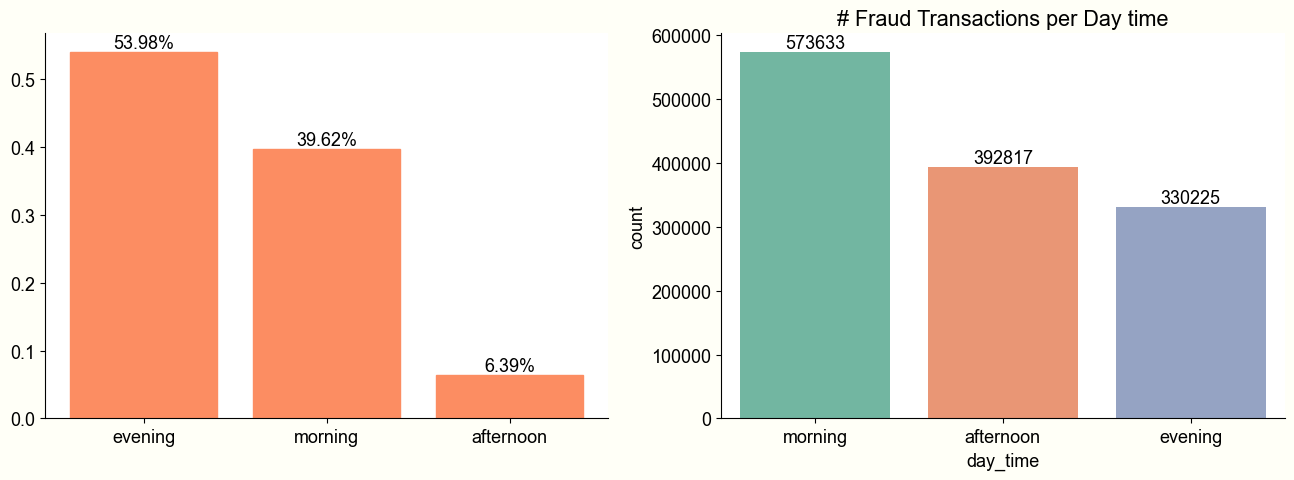

In [110]:
df_ax = (df_eda.query('is_fraud == 1').groupby('is_fraud')['day_time'].value_counts(normalize=True)).rename('percent').reset_index()
df_ax
_, ax = plt.subplots(1, 2, figsize=(16, 5))

bar = ax[0].bar(x=df_ax['day_time'], height=df_ax['percent'], color=colors[1], ec=colors[1])
ax[0].bar_label(bar, label_type='edge', fmt='{:.2%}')
ax[1].set_title('Fraud Transaction percentage per City Size')

ax[1] = sns.countplot(data=df_eda, x='day_time', palette=colors, hue_order=['evening', 'morning', 'afternoon'])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('# Fraud Transactions per Day time');

**True:** 54.08% of the fraudulent transactions occurs at the night period. 

## 4.3 Multivariate Analysis

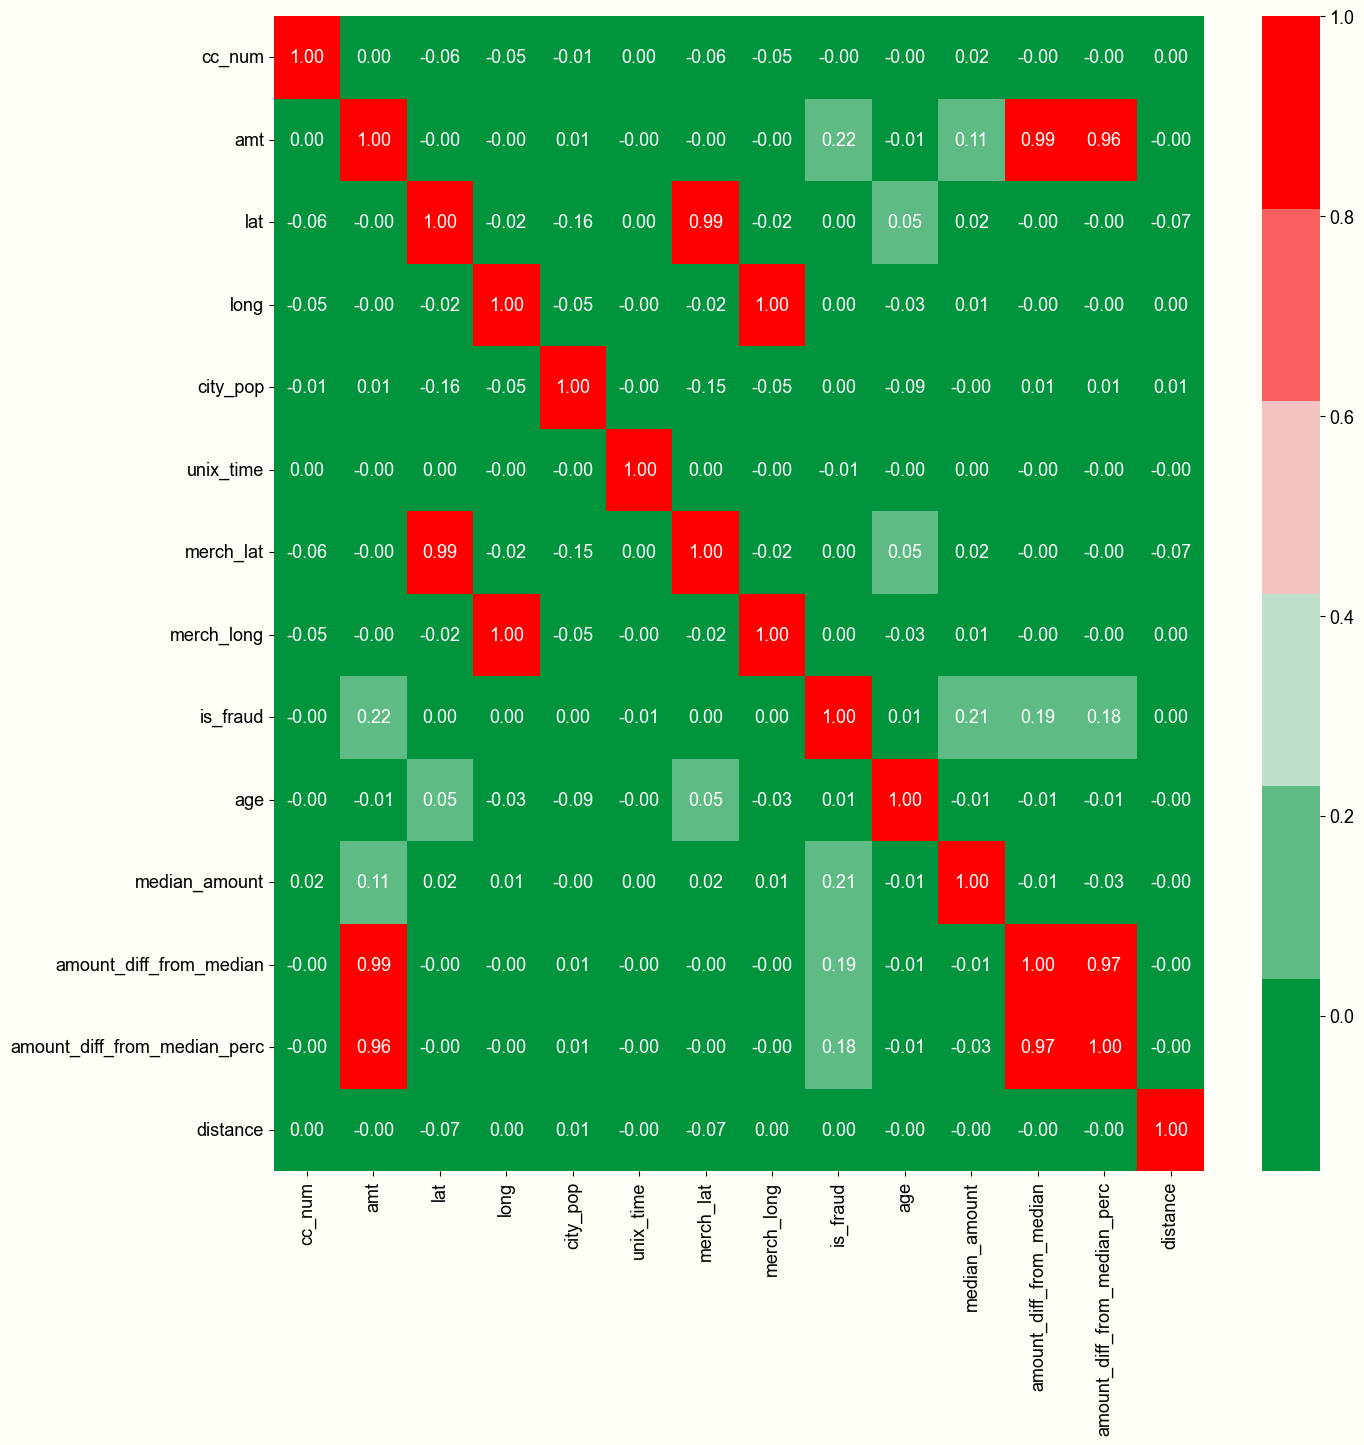

In [111]:
cor = df_eda.corr(numeric_only=True)

pal = sns.diverging_palette(150, 10, 200)
plt.figure(figsize=(15, 15))
sns.heatmap(data=cor, cmap=pal, annot=True, fmt='.2f');

In [112]:
dic = {}
lis = []
aux = df_eda.copy()
aux['is_fraud'] = aux['is_fraud'].apply(lambda x: 'yes' if x == 1 else 'no')

for att in ['merchant', 'category', 'gender', 'job', 'city', 'state', 'city_size', 'day_time', 'over_60_years','is_fraud']:
    for att_2 in ['merchant', 'category', 'gender', 'job', 'city', 'state', 'city_size', 'day_time', 'over_60_years','is_fraud']:
        
        #print(att, att_2)
        if att == att_2:
            a = 1.0
        else:
            try:
                a = cramer_v(aux[att], aux[att_2])
            except ValueError:
                a = 1.0

        lis.append(a)
        
    lista = lis.copy()
    dic[att] = lista
    lis.clear()
assoc = pd.DataFrame(dic)
assoc = assoc.set_index(assoc.columns)


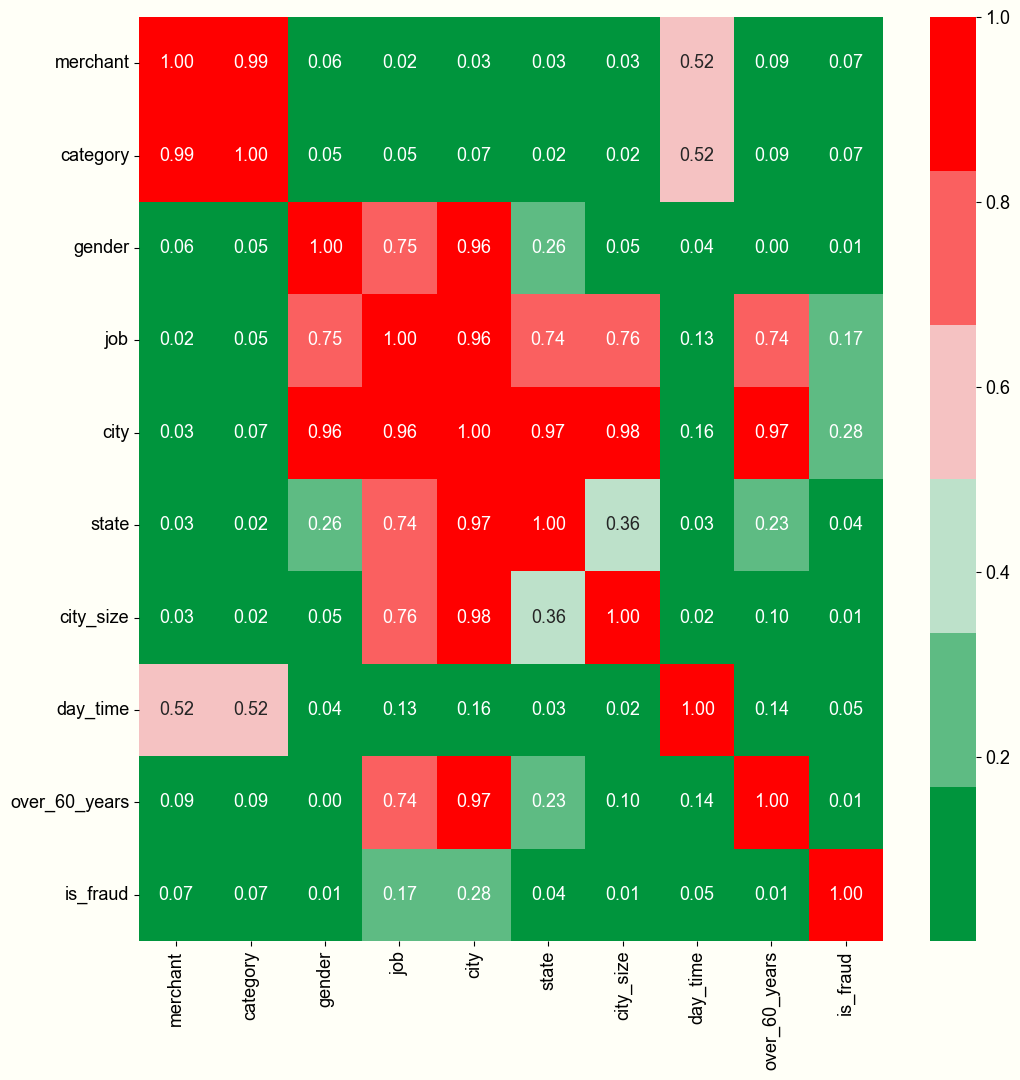

In [113]:
plt.figure(figsize=(12, 12))
sns.heatmap(assoc, cmap=pal, annot=True, fmt='.2f');

e:\users\b_tc\anaconda3\envs\fraud_env\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
e:\users\b_tc\anaconda3\envs\fraud_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


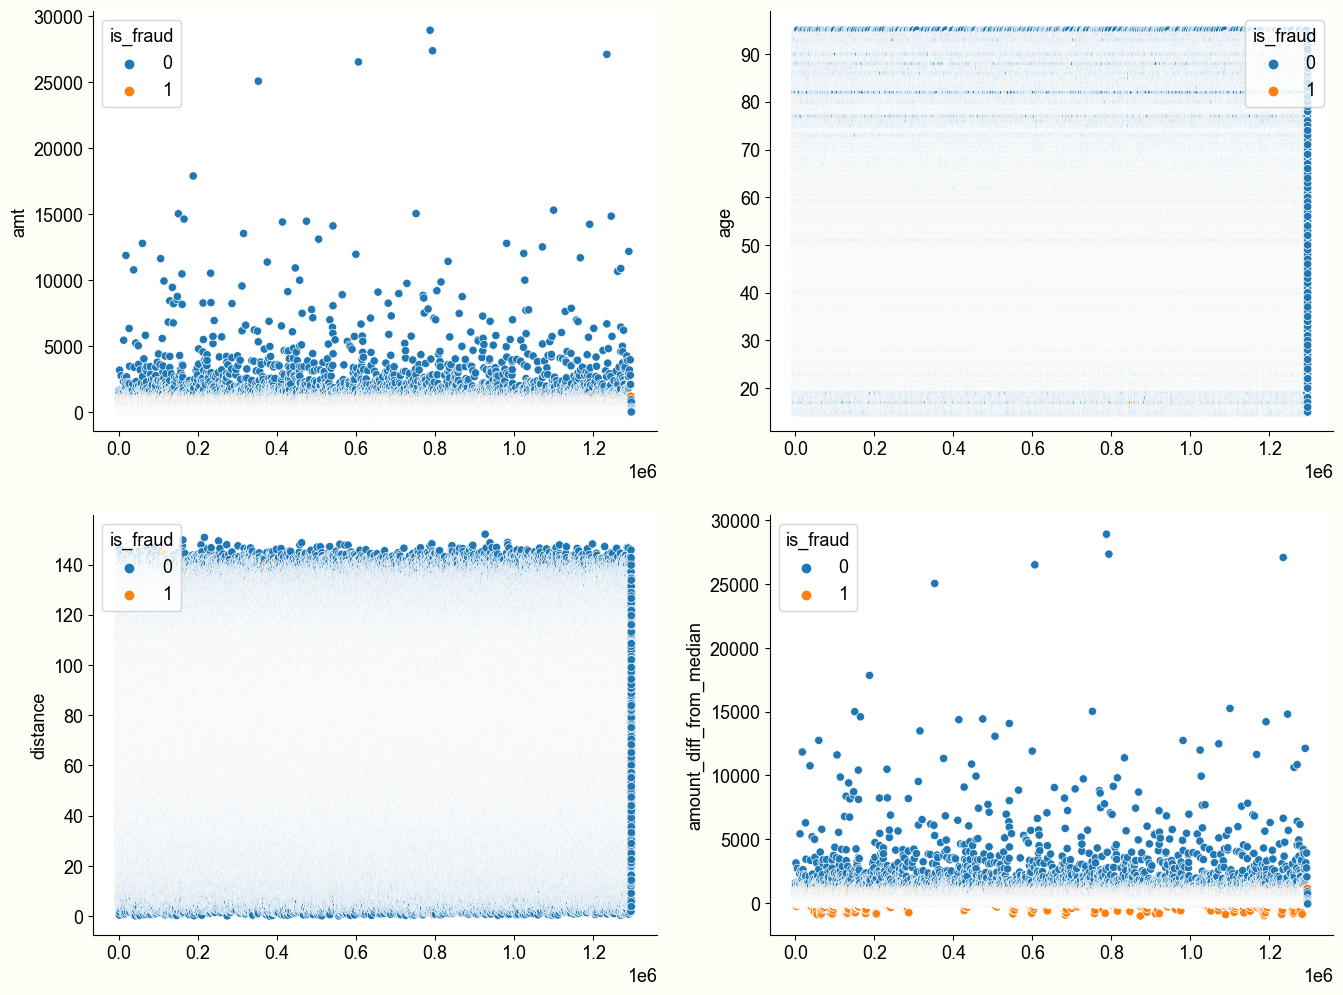

In [114]:
_, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=df_eda, x=df_eda.index.to_list(), y='amt', hue='is_fraud', ax=ax[0][0])
sns.scatterplot(data=df_eda, x=df_eda.index.to_list(), y='age', hue='is_fraud', ax=ax[0][1])
sns.scatterplot(data=df_eda, x=df_eda.index.to_list(), y='distance', hue='is_fraud', ax=ax[1][0])
sns.scatterplot(data=df_eda, x=df_eda.index.to_list(), y='amount_diff_from_median', hue='is_fraud', ax=ax[1][1]);
#plt.plot()

## 4.4 Hyphoteshis Summary

|Hipothesis|Conclusion|Relevance|
|----------|---------|----------|
|H1|TRUE|High|
|H2|TRUE|Average|
|H3|TRUE|Low|
|H4|FALSE|High|
|H5|TRUE|Average|
|H6|FALSE|High|
|H7|FALSE|Low|
|H8|FALSE|Low|
|H9|TRUE|High|


# 5.0 Preprocessing
<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">

<font align="center" color='white'>
    <h1/></h1>
</font>

</div>

In [161]:
df_prep = df_desc.copy()

In [162]:
df_prep.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [169]:
# pass columns
pass_cols = [
                #'cc_num',
                #'amount_diff_from_median_perc'
            ]
# categorical

# numeric
robust_cols = [
                 'amt',
                 #'zip',
                 'lat',
                 'long', 
                 'city_pop',
                 #'trans_num',
                 #'unix_time',
                 'merch_lat',
                 'merch_long',
                 'age',
                 'amount_diff_from_median_perc',
                 'distance'
              ]

# Onehot
oneh_cols = [
              'gender',
              'city_size', 
              'day_time',
              'over_60_years'
            ]
# potential target leakage (need to do more research about this method.)
woe_cols = [
            'category',
            'city',
            'job',
            #'state',
            ]



In [170]:
robust_sc = pp.RobustScaler()
robust_transformer = Pipeline([('robust_scaler', robust_sc)])

onehot = pp.OneHotEncoder(handle_unknown='ignore')

onehot_transformer = Pipeline([('onehot_enc', onehot)])

woe_encoder = ce.woe.WOEEncoder()

#freq_enc = enc.FrequencyEncoder()

transformer = ColumnTransformer([
                                    ('onehot', onehot_transformer, oneh_cols),
                                    ('woe',  woe_encoder, woe_cols),
                                    ('robust', robust_transformer, robust_cols),
                                    ('pass', 'passthrough', pass_cols),

                                    
                                   ], sparse_threshold=0)

preprocessing = Pipeline(steps=[
                                ('feature_engineering', feat_eng), 
                                ('transformer', transformer),])

In [171]:
X_train = df_prep.copy().drop(columns=['is_fraud'])
y_train = df_prep.copy()['is_fraud']

In [166]:
#data_val = pd.read_csv("../data/fraudTest.csv")
#X_val = data_val.drop(columns=['is_fraud'])
#y_val = data_val['is_fraud']

In [ ]:
X_transformed = pd.DataFrame(preprocessing.fit_transform(X_train.copy(), y_train.copy()))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,-0.193212,-0.463371,0.038204,0.192873,1.752770,0.126380,0.159355,1.416667,0.659378,-0.736652
1,1.0,0.0,-1.287749,0.112337,0.118476,0.211478,-0.118611,0.059497,0.242376,0.916667,0.176471,0.285467
2,1.0,0.0,0.221521,-0.046432,-0.199340,0.057266,-0.107838,-0.291947,0.074783,0.375000,-0.150293,0.158351
3,0.0,1.0,-1.262526,0.348039,0.419803,0.800727,-0.111259,0.284356,0.845493,0.166667,2.211888,-0.043831
4,1.0,0.0,-1.287749,-0.401008,0.844668,-0.135240,0.364463,0.803339,-0.107201,-0.916667,-0.962119,-0.274297
...,...,...,...,...,...,...,...,...,...,...,...,...
1102168,1.0,0.0,-1.262526,1.415577,0.038204,0.192873,1.752770,0.133103,0.140052,1.416667,0.659378,1.957150
1102169,1.0,0.0,-0.869515,0.236656,0.132902,-1.379754,-0.109982,0.209067,-1.374534,-0.583333,-0.259932,0.787879
1102170,1.0,0.0,0.221521,-0.538535,0.207426,-0.269020,-0.080061,0.267617,-0.230810,-0.500000,-0.205728,-0.785637
1102171,1.0,0.0,-1.262981,-0.328295,-0.445025,0.475264,0.512127,-0.389659,0.439212,1.750000,0.518017,-0.521561


# 6.0 Model Testing
<style>
    .Aquamarine {
        background-color: #008B8B;
    }
</style>

<div class="Aquamarine">

<font align="center" color='white'>
    <h1/></h1>
</font>

</div>

**Defining The Evaluation Metric**

In [172]:
cols = np.concatenate([oneh_cols, woe_cols, robust_cols, pass_cols])

## 6.1 LGBM

In [190]:
params = dict(verbosity=-1, n_estimators=1000, learning_rate=0.1, random_state=42, n_jobs=-1)
model = lgbm.LGBMClassifier(**params)
results = track_model_experiments(model=model, X=X_train, y=y_train.values, cv=5, training_parameters=params, metrics=['f1', 'recall', 'accuracy', 'roc_auc', 'precision', 'balanced_accuracy'], preprocess=preprocessing, columns=cols, description='Categorical: onehot, category:WOE, Numerical: Robust')

Registered model 'LGBMClassifier' already exists. Creating a new version of this model...
2023/08/24 18:10:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LGBMClassifier, version 11
Created version '11' of model 'LGBMClassifier'.


In [191]:
results

,fit_time,score_time,estimator,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_precision,train_precision,test_balanced_accuracy,train_balanced_accuracy
0,69.819689,19.426147,((FunctionTransformer(func=<function feature_e...,0.216798,0.767857,0.174550,0.751873,0.992701,0.997368,0.478768,0.897834,0.286026,0.784535,0.586007,0.875336
1,64.008437,20.335268,((FunctionTransformer(func=<function feature_e...,0.081372,0.530609,0.067955,0.551374,0.991120,0.994353,0.545812,0.808828,0.101392,0.511351,0.532224,0.774153
2,65.809174,19.362118,((FunctionTransformer(func=<function feature_e...,0.246293,0.745904,0.199201,0.731557,0.992943,0.997115,0.503405,0.882452,0.322546,0.760824,0.598382,0.865109
3,64.843471,20.204358,((FunctionTransformer(func=<function feature_e...,0.104202,0.515058,0.082612,0.485595,0.991779,0.994707,0.546534,0.767568,0.141069,0.548326,0.539842,0.741633
4,63.985123,20.033441,((FunctionTransformer(func=<function feature_e...,0.193025,0.526004,0.158455,0.533145,0.992327,0.994439,0.583214,0.780075,0.246888,0.519053,0.577820,0.765134


In [192]:
#evaluation_plot(results.estimator[0], X_val, y_val)

### Feature Importance

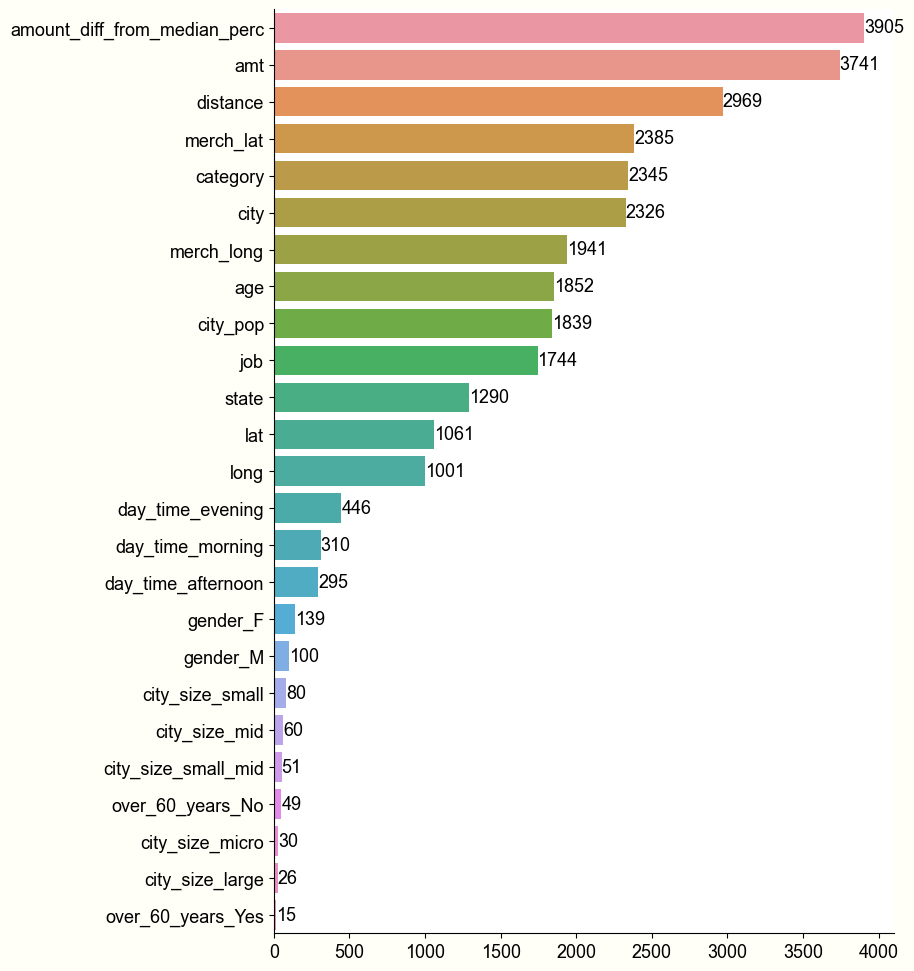

In [193]:
onehot_out = results.estimator[0][0][1].named_transformers_['onehot'].get_feature_names_out()
columns = np.concatenate([onehot_out, woe_cols, robust_cols, pass_cols])
importances = results.estimator[0][1].feature_importances_


plot_feature_importance(ordered_cols=columns, imp=importances)

## 6.2 XGboost

In [173]:
params = dict(n_jobs=-1)
model = xgb.XGBClassifier(**params)
results = track_model_experiments(model=model, X=X_train, y=y_train.values, cv=5, training_parameters=params, metrics=['f1', 'recall', 'accuracy', 'roc_auc', 'precision', 'balanced_accuracy'], preprocess=preprocessing, columns=cols, description='Categorical: onehot, category:WOE, Numerical: Robust')

e:\users\b_tc\anaconda3\envs\fraud_env\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'XGBClassifier' already exists. Creating a new version of this model...
2023/08/24 17:53:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: XGBClassifier, version 7
Created version '7' of model 'XGBClassifier'.


In [174]:
results

,fit_time,score_time,estimator,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_precision,train_precision,test_balanced_accuracy,train_balanced_accuracy
0,82.816588,16.203223,((FunctionTransformer(func=<function feature_e...,0.347872,0.919979,0.220520,0.871107,0.995215,0.999123,0.870130,0.999709,0.823383,0.974660,0.610122,0.935488
1,82.689848,16.469136,((FunctionTransformer(func=<function feature_e...,0.233839,0.921046,0.138574,0.871274,0.994744,0.999135,0.845285,0.999707,0.748201,0.976848,0.569151,0.935577
2,79.275406,16.387459,((FunctionTransformer(func=<function feature_e...,0.292994,0.916836,0.183877,0.865612,0.994864,0.999091,0.843759,0.999739,0.720627,0.974503,0.591731,0.932740
3,77.027143,15.891323,((FunctionTransformer(func=<function feature_e...,0.265711,0.920515,0.160560,0.869775,0.994864,0.999130,0.859913,0.999718,0.769968,0.977541,0.580140,0.934829
4,77.782551,16.169117,((FunctionTransformer(func=<function feature_e...,0.307448,0.916240,0.193742,0.863591,0.994945,0.999086,0.831030,0.999703,0.744246,0.975725,0.596677,0.931733


In [176]:
#evaluation_plot(results.estimator[0], X_val, y_val)

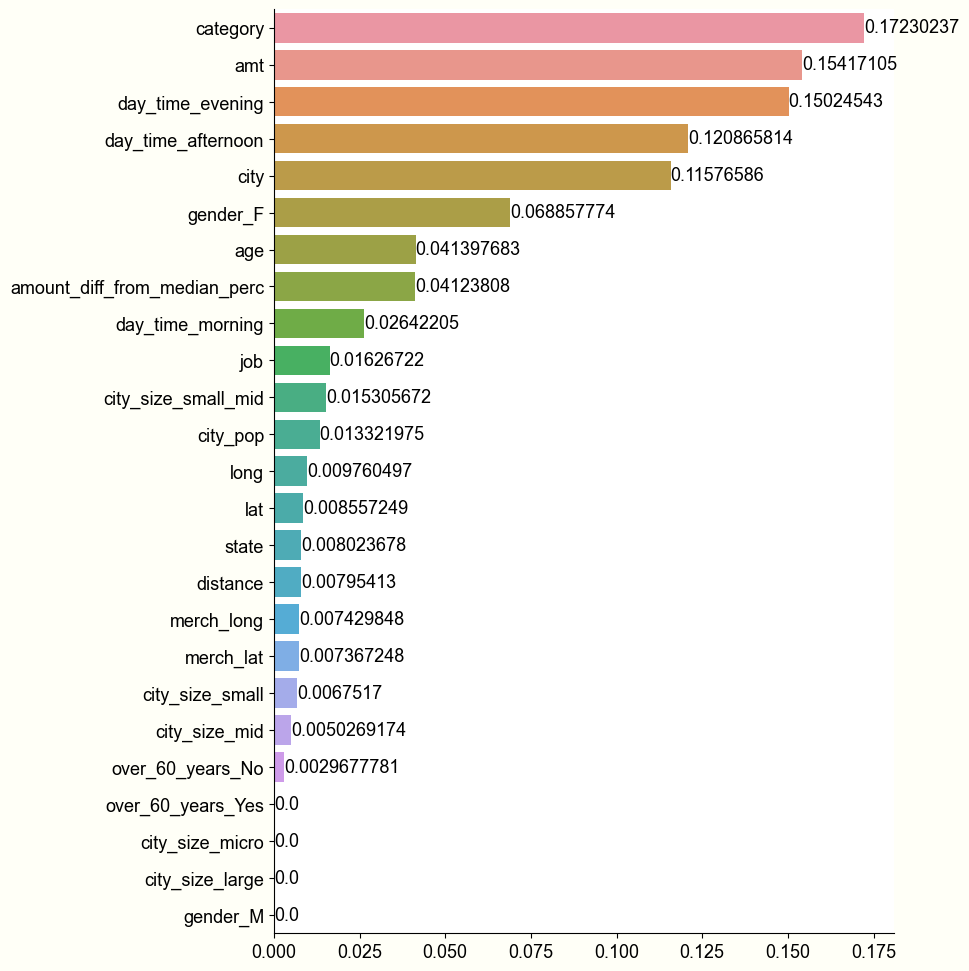

In [189]:
onehot_out = results.estimator[0][0][1].named_transformers_['onehot'].get_feature_names_out()
columns = np.concatenate([onehot_out, woe_cols, robust_cols, pass_cols])
importances = results.estimator[0][1].feature_importances_
plot_feature_importance(ordered_cols=columns, imp=importances)